# Part 2. EDA and Inferential Stats: Capstone 2

* [2.1 Contents](#1.1_Contents)<a id='1.1_Contents'></a>
* [2.2 Data Distributions](#2.2_Data_Distributions)

In [1245]:
params = {'axes.titlesize':'15',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15',
         'font.size' : '15.0'}

plt.rcParams.update(params)


In [1246]:
from utils import *

In [1247]:
tweet_stocks = pd.read_pickle('data/tweet_stocks.pkl')

In [1248]:
tweet_stocks.describe()

mentions      hashtags      cashtags         video        photos  \
count  11738.000000  11738.000000  11738.000000  11738.000000  11738.000000   
mean       1.708809      1.374936      0.020361      1.622678      1.663145   
std        2.905497      2.798369      0.359647      2.280602      2.436413   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      1.000000      1.000000   
75%        2.000000      2.000000      0.000000      2.000000      3.000000   
max       53.000000     42.000000     16.000000     36.000000     25.000000   

               urls     thumbnail  replies_count  retweets_count  \
count  11738.000000  11738.000000   11738.000000    11738.000000   
mean       1.566195      1.622678    1083.109303     2762.580508   
std        1.947314      2.280602    5788.531288    14467.562896   
min        0.000000      0.000000       0.000000        0.000000   
25%        0.000000      0.000000      27.000000       53.000000   
50%        1.000000      1.000000      78.000000      149.000000   
75%        2.000000      2.000000     236.000000      439.000000   
max       32.000000     36.000000  204414.000000   582467.000000   

        likes_count  number of tweets         price  percent change  
count  1.173800e+04      11738.000000  11738.000000    11738.000000  
mean   2.608611e+04          5.683592     89.831395        0.000821  
std    1.206448e+05          7.062947    124.006808        0.019997  
min    0.000000e+00          1.000000      7.190000       -0.179500  
25%    3.900000e+02          1.000000     21.735000       -0.005426  
50%    9.715000e+02          3.000000     61.655001        0.000373  
75%    2.815750e+03          7.000000     94.464998        0.006740  
max    4.727301e+06        162.000000    891.380005        0.269045

In [1249]:
tweet_stocks.duplicated(keep=False).any()

False

In [1250]:
tweet_stocks.T.duplicated(keep=False).any()

True

In [1251]:
tweet_stocks.T.duplicated(keep=False)

date                False
tweet               False
username            False
mentions            False
hashtags            False
cashtags            False
video                True
photos              False
urls                False
thumbnail            True
replies_count       False
retweets_count      False
likes_count         False
number of tweets    False
price               False
percent change      False
dtype: bool

In [1252]:
tweet_stocks.drop('thumbnail', axis=1, inplace=True)

In [1253]:
tweet_stocks.T.duplicated(keep=False).any()

False

In [1255]:
ceos_sum = tweet_stocks.groupby('username').sum()
ceos_mean = tweet_stocks.groupby('username').mean()

In [1256]:
ceos_sum

mentions  hashtags  cashtags  video  photos  urls  \
username                                                            
Benioff             3837       362         0   1999    2339  2696   
JohnLegere         10125     12154       231   9840   10294  7301   
elonmusk             286        19         0    667     653   776   
jack                 932       414         6    463     543  1095   
levie                 99        11         2    145     144   164   
richardbranson      4779      3179         0   5933    5549  6352   

                replies_count  retweets_count  likes_count  number of tweets  \
username                                                                       
Benioff                 63794          384674      1661480              4729   
JohnLegere             607419          760187      4035226             36437   
elonmusk             10962588        28797783    288713032             11182   
jack                   792240         1691746      7243011              4962   
levie                   40258          204086      1476453              1704   
richardbranson         247238          588694      3069607              7700   

                        price  percent change  
username                                       
Benioff         267299.770018        0.845123  
JohnLegere      262774.584891        1.012667  
elonmusk        433582.023379        4.369655  
jack             45434.271697        1.679164  
levie            17607.383144        0.943642  
richardbranson   27742.878298        0.792197

In [1257]:
ceos_mean

mentions  hashtags  cashtags     video    photos      urls  \
username                                                                     
Benioff         2.089869  0.197168  0.000000  1.088780  1.273965  1.468410   
JohnLegere      3.021486  3.626977  0.068935  2.936437  3.071919  2.178753   
elonmusk        0.132592  0.008809  0.000000  0.309226  0.302735  0.359759   
jack            0.646325  0.287101  0.004161  0.321082  0.376560  0.759362   
levie           0.104984  0.011665  0.002121  0.153765  0.152704  0.173913   
richardbranson  2.378795  1.582379  0.000000  2.953211  2.762071  3.161772   

                replies_count  retweets_count    likes_count  \
username                                                       
Benioff             34.746187      209.517429     904.945534   
JohnLegere         181.264996      226.853775    1204.185616   
elonmusk          5082.331015    13350.849791  133849.342605   
jack               549.403606     1173.194175    5022.892510   
levie               42.691410      216.422057    1565.697773   
richardbranson     123.065207      293.028372    1527.927825   

                number of tweets       price  percent change  
username                                                      
Benioff                 2.575708  145.588110        0.000460  
JohnLegere             10.873471   78.416767        0.000302  
elonmusk                5.184052  201.011601        0.002026  
jack                    3.441054   31.507817        0.001164  
levie                   1.806999   18.671668        0.001001  
richardbranson          3.832753   13.809297        0.000394

# Distributions<a id='2.2_Data_Distributions'></a>

In [1396]:
def plot_univariate_dist(df, feature, color, plot_mean = True, plot_std = False, std_lab=False, kde = True, stat='count', truncate=True, auto_bins=False):

    mean = df[feature].mean()
    std = df[feature].std()
    bins = round(np.sqrt(len(df)))
    max_height = test = pd.cut(df[feature], bins = bins).value_counts()[0]
    min_val = df[feature].min()
    
    if kde == True:
        sns.histplot(df[feature], bins=bins, color=color, kde=True, edgecolor="black", line_kws = {'lw':'4'}, stat=stat, alpha=0.55)
    else:
        sns.histplot(df[feature], bins=bins, color=color, stat=stat, alpha=0.5, edgecolor='black')
    
    if plot_mean == True:
        plt.axvline(x=mean, linestyle = '--',color='k', alpha=0.5)
    if plot_std == True:    
        plt.axvline(x= std + mean, linestyle='-.', color = 'r', alpha=0.5)
        plt.axvline(x= 2*std + mean, linestyle='--', color = 'r', alpha=0.5)
        
        plt.axvline(x= -std + mean, linestyle = '-.', color='r', alpha=0.5)
        plt.axvline(x= -2*std + mean, linestyle = '--', color='r', alpha=0.5)
    if std_lab == True:
        plt.text(std + mean, max_height, '+ 1 SD', fontsize=20)
        plt.text(2*std + mean, max_height, '+ 2 SD', fontsize=20)
       
        plt.text(-2*std + mean, max_height, '- 2 SD', fontsize=20)
        plt.text(-std + mean, max_height, '- 1 SD', fontsize=20)
    if truncate == True:
        if min_val < 0:
            plt.xlim(-3.75*std, 3.75*std)
        else:
            plt.xlim(-1*std, 3.75*std)
        
    plt.ylim(0, max_height + (max_height * 0.5))
    
def data_table(df, feature):
    
    std = df[feature].std()

    data_table_indx = ['count', 'null_vals', 'btwn_0_1_std', 'btwn_1_2_std', 'over_2_std']
    data_table = pd.DataFrame(index = data_table_indx, columns=['counts', 'pct_total'])

    data_table['counts']['count'] = len(df[feature])
    data_table['pct_total']['count'] = round(data_table['counts']['count'] / len(df), 3)

    null_vals = len(df[feature][df[feature] == 0])
    data_table['counts']['null_vals'] = null_vals
    data_table['pct_total']['null_vals'] = round(null_vals / data_table['counts']['count'], 3)

    witin = (df[feature] >= -std) & (df[feature] <= std)
    sum_within = len(df[feature][witin])
    data_table['counts']['btwn_0_1_std'] = sum_within
    data_table['pct_total']['btwn_0_1_std'] = round(sum_within / data_table['counts']['count'], 3)

    within_2 = (df[feature] >= -2*std) & (df[feature] <= 2*std)
    sum_within_2 = len(df[feature][within_2]) - sum_within
    data_table['counts']['btwn_1_2_std'] = sum_within_2
    data_table['pct_total']['btwn_1_2_std'] = round(sum_within_2 / data_table['counts']['count'], 3)

    over_2 = len(df[feature]) - (sum_within_2 + sum_within)
    data_table['counts']['over_2_std'] = over_2
    data_table['pct_total']['over_2_std'] = round(over_2 / data_table['counts']['count'], 3)
    assert data_table['counts']['count'] == data_table['counts'][['btwn_0_1_std', 'btwn_1_2_std', 'over_2_std']].sum()
    
    return data_table

def display_side_by_side(*args,titles=cycle([''])):
    """https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side"""
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
  

In [1261]:
username_list = list(tweet_stocks['username'].unique())
color_list = ['orange', 'green', 'blue', 'brown', 'red', 'pink']
stocks_list = ['TSLA', 'BOX', 'TWTR', 'CRM', 'SPCE', 'TMUS']

mapper = list(zip(username_list, stocks_list, color_list))

In [1262]:
for user_stock_color in mapper:
    print(user_stock_color)

('elonmusk', 'TSLA', 'orange')
('levie', 'BOX', 'green')
('jack', 'TWTR', 'blue')
('Benioff', 'CRM', 'brown')
('richardbranson', 'SPCE', 'red')
('JohnLegere', 'TMUS', 'pink')


In [1341]:
features = list(tweet_stocks.drop(labels = ['date', 'tweet', 'username', 'price', 'percent change'], axis=1))

In [1378]:
eda_df['percent change'] = eda_df['percent change']*100

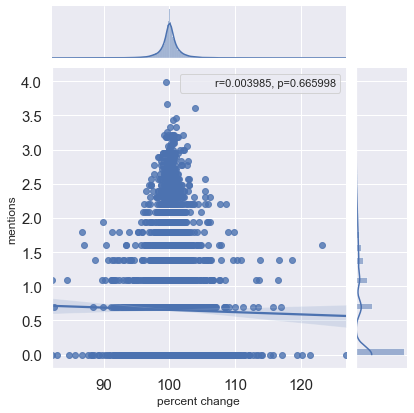

In [1379]:
x = tweet_stocks['percent change']
y = tweet_stocks['mentions']

import scipy.stats as stats
graph = sns.jointplot(data=eda_df, x = 'percent change', y ='mentions', kind='reg')
r, p = stats.pearsonr(x, y)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


In [1361]:
df = tweet_stocks
corr_list = {}
log_corr_list = {}
sqrt_corr_list = {}
for user in username_list:
    corr_list[user] = np.abs(df[df['username'] == user].corr()).sort_values(by='percent change')
    log_corr_list[user] = np.abs(eda_df[eda_df['username'] == user].corr()).sort_values(by='percent change')
    sqrt_corr_list[user] = np.abs(eda_df[eda_df['username'] == user].corr()).sort_values(by='percent change')

In [1358]:
corr_list['Overall'] = np.abs(df.corr()).sort_values(by='percent change')
log_corr_list['Overall'] = np.abs(eda_df.corr()).sort_values(by='percent change')
sqrt_corr_list['Overall'] = np.abs

In [1359]:
log_corr_list['Overall'] = np.abs(eda_df.corr()).sort_values(by='percent change')

In [1357]:
log_corr_list['elonmusk']

mentions  hashtags  cashtags     video    photos      urls  \
hashtags          0.052745  1.000000       NaN  0.074594  0.077438  0.047571   
retweets_count    0.144354  0.071165       NaN  0.472662  0.441753  0.264000   
likes_count       0.118401  0.071370       NaN  0.474776  0.446730  0.174641   
replies_count     0.105535  0.072847       NaN  0.427951  0.402056  0.201050   
number of tweets  0.181962  0.078305       NaN  0.384763  0.360319  0.306300   
urls              0.158783  0.047571       NaN  0.090887  0.078584  1.000000   
video             0.136120  0.074594       NaN  1.000000  0.940373  0.090887   
price             0.063809  0.008106       NaN  0.055152  0.059509  0.157320   
photos            0.124622  0.077438       NaN  0.940373  1.000000  0.078584   
mentions          1.000000  0.052745       NaN  0.136120  0.124622  0.158783   
percent change    0.025327  0.000043       NaN  0.016863  0.025298  0.011839   
cashtags               NaN       NaN       NaN       NaN       NaN       NaN   

                  replies_count  retweets_count  likes_count  \
hashtags               0.072847        0.071165     0.071370   
retweets_count         0.921229        1.000000     0.952466   
likes_count            0.946920        0.952466     1.000000   
replies_count          1.000000        0.921229     0.946920   
number of tweets       0.615343        0.564996     0.594144   
urls                   0.201050        0.264000     0.174641   
video                  0.427951        0.472662     0.474776   
price                  0.405135        0.198209     0.309342   
photos                 0.402056        0.441753     0.446730   
mentions               0.105535        0.144354     0.118401   
percent change         0.008091        0.000309     0.007859   
cashtags                    NaN             NaN          NaN   

                  number of tweets     price  percent change  
hashtags                  0.078305  0.008106        0.000043  
retweets_count            0.564996  0.198209        0.000309  
likes_count               0.594144  0.309342        0.007859  
replies_count             0.615343  0.405135        0.008091  
number of tweets          1.000000  0.064914        0.009313  
urls                      0.306300  0.157320        0.011839  
video                     0.384763  0.055152        0.016863  
price                     0.064914  1.000000        0.022040  
photos                    0.360319  0.059509        0.025298  
mentions                  0.181962  0.063809        0.025327  
percent change            0.009313  0.022040        1.000000  
cashtags                       NaN       NaN             NaN

In [1338]:
eda_df[features] += 1

In [1343]:
eda_df[features] = np.log(eda_df[features])

In [1363]:
eda_df_sqrt = tweet_stocks.copy()
eda_df_sqrt[features] = np.sqrt(eda_df_sqrt[features])

In [1364]:
np.abs(eda_df_sqrt.corr()).sort_values(by='percent change')

mentions  hashtags  cashtags     video    photos      urls  \
number of tweets  0.525123  0.632487  0.149015  0.608000  0.596348  0.422905   
cashtags          0.132729  0.138522  1.000000  0.117025  0.112143  0.091381   
mentions          1.000000  0.591075  0.132729  0.595093  0.572991  0.550319   
video             0.595093  0.650508  0.117025  1.000000  0.952693  0.501743   
photos            0.572991  0.627240  0.112143  0.952693  1.000000  0.476397   
replies_count     0.146663  0.105761  0.006890  0.062086  0.062003  0.146444   
urls              0.550319  0.494219  0.091381  0.501743  0.476397  1.000000   
retweets_count    0.153688  0.144074  0.011704  0.060245  0.062609  0.136648   
hashtags          0.591075  1.000000  0.138522  0.650508  0.627240  0.494219   
likes_count       0.204001  0.184951  0.016609  0.103549  0.102669  0.208455   
price             0.157564  0.191567  0.016088  0.169176  0.159198  0.210830   
percent change    0.008346  0.019353  0.004960  0.011333  0.011688  0.013631   

                  replies_count  retweets_count  likes_count  \
number of tweets       0.225976        0.181329     0.172483   
cashtags               0.006890        0.011704     0.016609   
mentions               0.146663        0.153688     0.204001   
video                  0.062086        0.060245     0.103549   
photos                 0.062003        0.062609     0.102669   
replies_count          1.000000        0.873856     0.913062   
urls                   0.146444        0.136648     0.208455   
retweets_count         0.873856        1.000000     0.952602   
hashtags               0.105761        0.144074     0.184951   
likes_count            0.913062        0.952602     1.000000   
price                  0.510400        0.365091     0.478395   
percent change         0.012719        0.018162     0.021189   

                  number of tweets     price  percent change  
number of tweets          1.000000  0.010719        0.004744  
cashtags                  0.149015  0.016088        0.004960  
mentions                  0.525123  0.157564        0.008346  
video                     0.608000  0.169176        0.011333  
photos                    0.596348  0.159198        0.011688  
replies_count             0.225976  0.510400        0.012719  
urls                      0.422905  0.210830        0.013631  
retweets_count            0.181329  0.365091        0.018162  
hashtags                  0.632487  0.191567        0.019353  
likes_count               0.172483  0.478395        0.021189  
price                     0.010719  1.000000        0.022563  
percent change            0.004744  0.022563        1.000000

In [1344]:
np.abs(eda_df.corr()).sort_values(by='percent change')

mentions  hashtags  cashtags     video    photos      urls  \
number of tweets  0.522219  0.632197  0.136327  0.622662  0.607084  0.448669   
cashtags          0.130066  0.135343  1.000000  0.113084  0.108637  0.090587   
mentions          1.000000  0.593304  0.130066  0.605076  0.581573  0.560846   
video             0.605076  0.657340  0.113084  1.000000  0.952695  0.524217   
photos            0.581573  0.632410  0.108637  0.952695  1.000000  0.495565   
urls              0.560846  0.502993  0.090587  0.524217  0.495565  1.000000   
hashtags          0.593304  1.000000  0.135343  0.657340  0.632410  0.502993   
replies_count     0.032459  0.077128  0.024553  0.091583  0.082041  0.004366   
price             0.158744  0.191290  0.015818  0.173538  0.162582  0.211225   
retweets_count    0.002955  0.001868  0.016186  0.081927  0.073658  0.038236   
likes_count       0.102695  0.060268  0.009397  0.006192  0.001788  0.092205   
percent change    0.008695  0.019185  0.005363  0.011744  0.011869  0.012736   

                  replies_count  retweets_count  likes_count  \
number of tweets       0.417246        0.331734     0.300544   
cashtags               0.024553        0.016186     0.009397   
mentions               0.032459        0.002955     0.102695   
video                  0.091583        0.081927     0.006192   
photos                 0.082041        0.073658     0.001788   
urls                   0.004366        0.038236     0.092205   
hashtags               0.077128        0.001868     0.060268   
replies_count          1.000000        0.875676     0.920146   
price                  0.325724        0.284735     0.358540   
retweets_count         0.875676        1.000000     0.946287   
likes_count            0.920146        0.946287     1.000000   
percent change         0.021738        0.024987     0.031568   

                  number of tweets     price  percent change  
number of tweets          1.000000  0.004924        0.004052  
cashtags                  0.136327  0.015818        0.005363  
mentions                  0.522219  0.158744        0.008695  
video                     0.622662  0.173538        0.011744  
photos                    0.607084  0.162582        0.011869  
urls                      0.448669  0.211225        0.012736  
hashtags                  0.632197  0.191290        0.019185  
replies_count             0.417246  0.325724        0.021738  
price                     0.004924  1.000000        0.022563  
retweets_count            0.331734  0.284735        0.024987  
likes_count               0.300544  0.358540        0.031568  
percent change            0.004052  0.022563        1.000000

percent change 
 
 
 
 
 mean 
 0.000821 
 
 
 std 
 0.019997 
 
 
 min 
 -0.179500 
 
 
 25% 
 -0.005426 
 
 
 50% 
 0.000373 
 
 
 75% 
 0.006740 
 
 
 max 
 0.269045 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 317 
 0.027 
 
 
 btwn_0_1_std 
 9894 
 0.843 
 
 
 btwn_1_2_std 
 1286 
 0.11 
 
 
 over_2_std 
 558 
 0.048

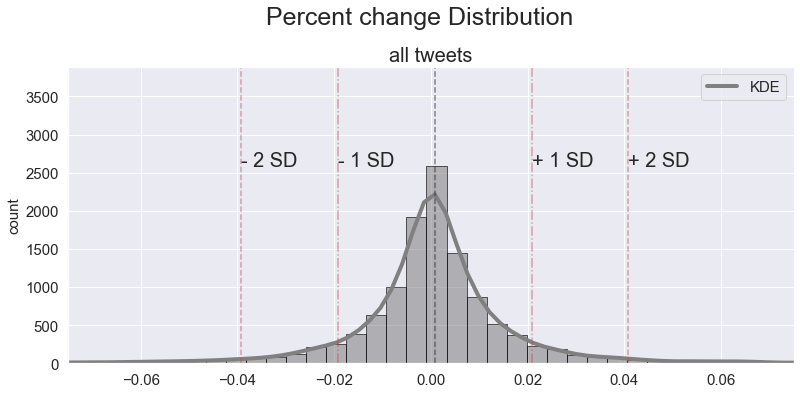

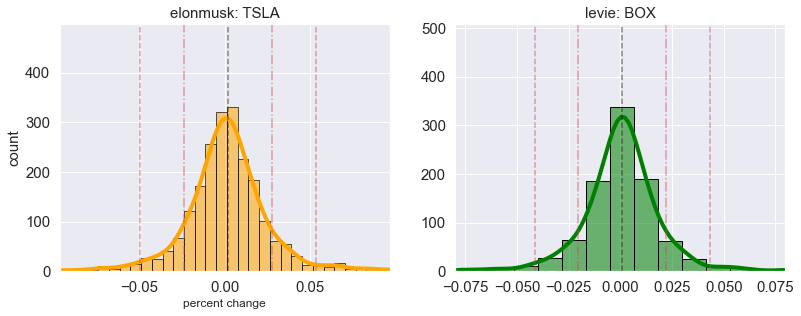

percent change 
 
 
 
 
 mean 
 0.002026 
 
 
 std 
 0.025820 
 
 
 min 
 -0.118469 
 
 
 25% 
 -0.010052 
 
 
 50% 
 0.001234 
 
 
 75% 
 0.013020 
 
 
 max 
 0.171549 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 3 
 0.001 
 
 
 btwn_0_1_std 
 1723 
 0.799 
 
 
 btwn_1_2_std 
 312 
 0.145 
 
 
 over_2_std 
 122 
 0.057 
 
 
 
 
 
 
 percent change 
 
 
 
 
 mean 
 0.001001 
 
 
 std 
 0.021255 
 
 
 min 
 -0.143807 
 
 
 25% 
 -0.007685 
 
 
 50% 
 0.000870 
 
 
 75% 
 0.009556 
 
 
 max 
 0.214807 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 19 
 0.02 
 
 
 btwn_0_1_std 
 764 
 0.81 
 
 
 btwn_1_2_std 
 135 
 0.143 
 
 
 over_2_std 
 44 
 0.047

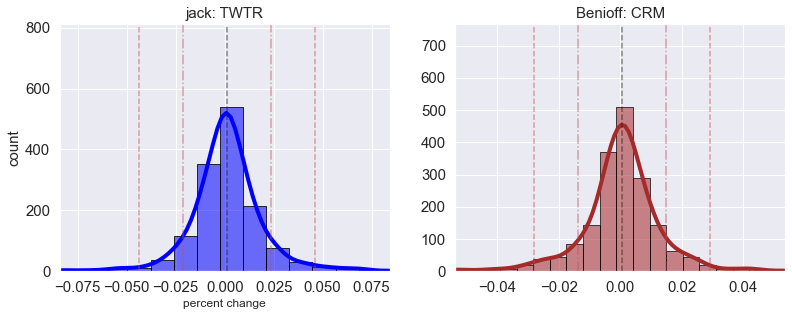

percent change 
 
 
 
 
 mean 
 0.001164 
 
 
 std 
 0.022442 
 
 
 min 
 -0.179500 
 
 
 25% 
 -0.007303 
 
 
 50% 
 0.000839 
 
 
 75% 
 0.009306 
 
 
 max 
 0.269045 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 27 
 0.019 
 
 
 btwn_0_1_std 
 1208 
 0.838 
 
 
 btwn_1_2_std 
 168 
 0.117 
 
 
 over_2_std 
 66 
 0.046 
 
 
 
 
 
 
 percent change 
 
 
 
 
 mean 
 0.000460 
 
 
 std 
 0.014293 
 
 
 min 
 -0.066184 
 
 
 25% 
 -0.004871 
 
 
 50% 
 0.000609 
 
 
 75% 
 0.006505 
 
 
 max 
 0.166212 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 19 
 0.01 
 
 
 btwn_0_1_std 
 1486 
 0.809 
 
 
 btwn_1_2_std 
 258 
 0.141 
 
 
 over_2_std 
 92 
 0.05

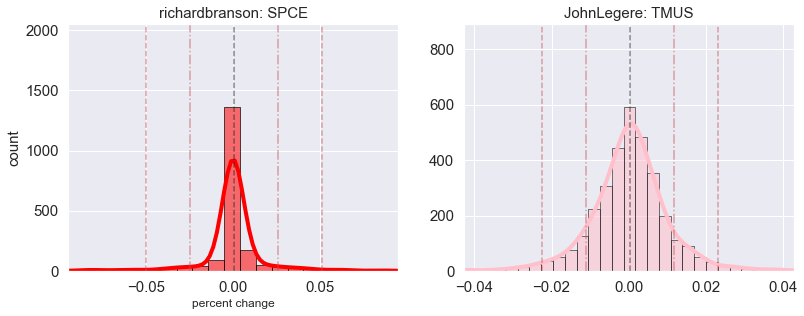

percent change 
 
 
 
 
 mean 
 0.000394 
 
 
 std 
 0.025351 
 
 
 min 
 -0.178809 
 
 
 25% 
 -0.002002 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.002484 
 
 
 max 
 0.232461 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 211 
 0.105 
 
 
 btwn_0_1_std 
 1755 
 0.874 
 
 
 btwn_1_2_std 
 139 
 0.069 
 
 
 over_2_std 
 115 
 0.057 
 
 
 
 
 
 
 percent change 
 
 
 
 
 mean 
 0.000302 
 
 
 std 
 0.011392 
 
 
 min 
 -0.068431 
 
 
 25% 
 -0.004949 
 
 
 50% 
 0.000307 
 
 
 75% 
 0.005462 
 
 
 max 
 0.108482 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 38 
 0.011 
 
 
 btwn_0_1_std 
 2662 
 0.794 
 
 
 btwn_1_2_std 
 522 
 0.156 
 
 
 over_2_std 
 167 
 0.05

In [1398]:
df = tweet_stocks
feature = 'percent change'

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(13,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=True, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(13,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


In [1428]:
df = tweet_stocks[tweet_stocks['username'] == user]
bins = [df['percent change'].min(), -2*df['percent change'].std(), -df['percent change'].std(), df['percent change'].std(), 2*df['percent change'].std(), df['percent change'].max()]
df['bins'] = pd.cut(df, bins)

ValueError: Input array must be 1 dimensional

In [1430]:
bins = [df['percent change'].min(), -2*df['percent change'].std(), -df['percent change'].std(), df['percent change'].std(), 2*df['percent change'].std(), df['percent change'].max()]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[-0.06843111568332749,
 -0.02278385687684755,
 -0.011391928438423776,
 0.011391928438423776,
 0.02278385687684755,
 0.10848217557517859]

bins
2       2662
3        264
1        258
4         85
0         81
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


bins
2       1723
3        175
1        137
4         74
0         47
dtype: int64


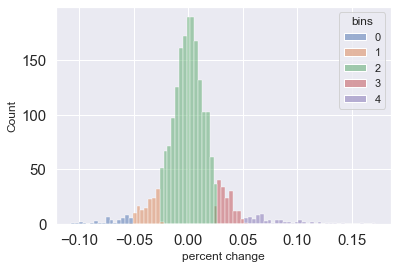

In [1449]:
user = 'elonmusk'
df = tweet_stocks[tweet_stocks['username'] == user]
bins = [df['percent change'].min(), -2*df['percent change'].std(), -df['percent change'].std(), df['percent change'].std(), 2*df['percent change'].std(), df['percent change'].max()]
df['bins'] = pd.cut(df['percent change'], bins=bins, labels=[0,1,2,3,4])
print(df[['bins']].value_counts())
_ = sns.histplot(data=df, x='percent change', hue='bins')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


bins     
no change    1723
rise          249
fall          184
dtype: int64


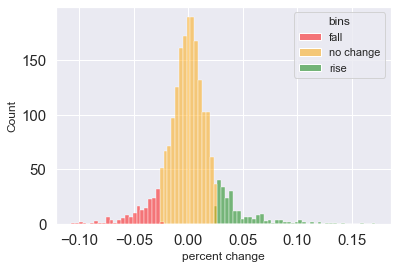

In [1454]:
user = 'elonmusk'
df = tweet_stocks[tweet_stocks['username'] == user]
bins = [df['percent change'].min(), -df['percent change'].std(), df['percent change'].std(), df['percent change'].max()]
df['bins'] = pd.cut(df['percent change'], bins=bins, labels = ['fall', 'no change', 'rise'])
print(df[['bins']].value_counts())
_ = sns.histplot(data=df, x='percent change', hue='bins', palette=['red', 'orange', 'green'])

In [1456]:
df_new = df[df['bins'] != 'no change']
df_new

date                                              tweet  \
26   2016-09-01 16:00:00  Loss of Falcon vehicle today during propellant...   
56   2016-10-06 09:30:00  @derektmead Thus I deserve to be top of the ta...   
71   2016-10-27 09:30:00  Dear cult members, I love you  https://t.co/1O...   
85   2016-11-18 16:00:00  @vicentes @TeslaMotors @FortuneMagazine big mo...   
87   2016-11-22 16:00:00  @stryker_88 That doesn't make sense. Will look...   
...                  ...                                                ...   
2155 2021-07-07 16:00:00  @TeslaOwnersDE And by 2060, Tesla production w...   
2157 2021-07-08 16:00:00                               @Erdayastronaut True   
2164 2021-07-12 16:00:00                        @antoniogm @flcnhvy Exactly   
2167 2021-07-14 16:00:00  @SamTwits @TeslaOwnersEBay @Kristennetten @Rat...   
2177 2021-07-19 16:00:00  @jack @BitcoinMagazine @CathieDWood Sure, I ha...   

      username  mentions  hashtags  cashtags  video  photos  urls  \
26    elonmusk         0         0         0      0       0     0   
56    elonmusk         0         0         0      0       0     0   
71    elonmusk         0         0         0      0       0     1   
85    elonmusk         0         0         0      0       0     0   
87    elonmusk         0         0         0      0       0     1   
...        ...       ...       ...       ...    ...     ...   ...   
2155  elonmusk         0         0         0      2       1     0   
2157  elonmusk         0         0         0      0       0     0   
2164  elonmusk         0         0         0      0       0     0   
2167  elonmusk         0         0         0      0       0     1   
2177  elonmusk         0         0         0      0       0     1   

      replies_count  retweets_count  likes_count  number of tweets  \
26             1159            4848        10743                 1   
56              103             100          986                 3   
71              936            2324        24713                 1   
85               30              46          264                 1   
87              792            4395        15979                 5   
...             ...             ...          ...               ...   
2155          17880           28657       400433                 9   
2157            543             326         9365                 1   
2164            329             193         3891                 1   
2167          11909           11755       190009                10   
2177           1953            1477        22616                 2   

           price  percent change  bins  
26     40.153999       -0.039424  fall  
56     40.492001       -0.028783  fall  
71     42.268002        0.044996  rise  
85     37.004002       -0.029531  fall  
87     38.234001        0.028681  rise  
...          ...             ...   ...  
2155  644.650024       -0.029536  fall  
2157  652.809998        0.038894  rise  
2164  685.700012        0.035488  rise  
2167  653.380005       -0.025896  fall  
2177  646.219971        0.025925  rise  

[434 rows x 16 columns]

In [1457]:
print(df_new.corr())

mentions  hashtags  cashtags     video    photos      urls  \
mentions          1.000000  0.006707       NaN  0.222117  0.215417  0.107954   
hashtags          0.006707  1.000000       NaN  0.080522  0.062597  0.227951   
cashtags               NaN       NaN       NaN       NaN       NaN       NaN   
video             0.222117  0.080522       NaN  1.000000  0.929887  0.222080   
photos            0.215417  0.062597       NaN  0.929887  1.000000  0.189487   
urls              0.107954  0.227951       NaN  0.222080  0.189487  1.000000   
replies_count     0.133361  0.011353       NaN  0.212865  0.180389  0.006791   
retweets_count    0.144707  0.091738       NaN  0.384153  0.347479  0.051230   
likes_count       0.120323  0.023669       NaN  0.431300  0.400961  0.010626   
number of tweets  0.135826  0.019178       NaN  0.374125  0.309276  0.372372   
price            -0.068798 -0.044012       NaN -0.016352 -0.004104 -0.172276   
percent change   -0.013363  0.021117       NaN  0.066649  0.090454 -0.020472   

                  replies_count  retweets_count  likes_count  \
mentions               0.133361        0.144707     0.120323   
hashtags               0.011353        0.091738     0.023669   
cashtags                    NaN             NaN          NaN   
video                  0.212865        0.384153     0.431300   
photos                 0.180389        0.347479     0.400961   
urls                   0.006791        0.051230     0.010626   
replies_count          1.000000        0.728926     0.752912   
retweets_count         0.728926        1.000000     0.906674   
likes_count            0.752912        0.906674     1.000000   
number of tweets       0.260709        0.307436     0.373155   
price                  0.326784        0.154224     0.279657   
percent change        -0.032858       -0.016340    -0.013635   

                  number of tweets     price  percent change  
mentions                  0.135826 -0.068798       -0.013363  
hashtags                  0.019178 -0.044012        0.021117  
cashtags                       NaN       NaN             NaN  
video                     0.374125 -0.016352        0.066649  
photos                    0.309276 -0.004104        0.090454  
urls                      0.372372 -0.172276       -0.020472  
replies_count             0.260709  0.326784       -0.032858  
retweets_count            0.307436  0.154224       -0.016340  
likes_count               0.373155  0.279657       -0.013635  
number of tweets          1.000000 -0.057098       -0.005633  
price                    -0.057098  1.000000        0.020225  
percent change           -0.005633  0.020225        1.000000

In [1458]:
print(df_new[df_new['bins'] == 'fall'].corr())

mentions  hashtags  cashtags     video    photos      urls  \
mentions          1.000000       NaN       NaN -0.014146 -0.094642  0.123867   
hashtags               NaN       NaN       NaN       NaN       NaN       NaN   
cashtags               NaN       NaN       NaN       NaN       NaN       NaN   
video            -0.014146       NaN       NaN  1.000000  0.945208  0.154271   
photos           -0.094642       NaN       NaN  0.945208  1.000000  0.082047   
urls              0.123867       NaN       NaN  0.154271  0.082047  1.000000   
replies_count     0.275143       NaN       NaN  0.234364  0.195959 -0.003111   
retweets_count    0.167085       NaN       NaN  0.466357  0.442632  0.059214   
likes_count       0.114769       NaN       NaN  0.527333  0.502390  0.064558   
number of tweets  0.154350       NaN       NaN  0.288004  0.243374  0.408957   
price            -0.037306       NaN       NaN  0.030406 -0.002638 -0.149160   
percent change   -0.103761       NaN       NaN  0.063397  0.061735 -0.025069   

                  replies_count  retweets_count  likes_count  \
mentions               0.275143        0.167085     0.114769   
hashtags                    NaN             NaN          NaN   
cashtags                    NaN             NaN          NaN   
video                  0.234364        0.466357     0.527333   
photos                 0.195959        0.442632     0.502390   
urls                  -0.003111        0.059214     0.064558   
replies_count          1.000000        0.732289     0.737721   
retweets_count         0.732289        1.000000     0.901373   
likes_count            0.737721        0.901373     1.000000   
number of tweets       0.300182        0.330646     0.430180   
price                  0.307857        0.154830     0.287827   
percent change        -0.049074       -0.013485    -0.022592   

                  number of tweets     price  percent change  
mentions                  0.154350 -0.037306       -0.103761  
hashtags                       NaN       NaN             NaN  
cashtags                       NaN       NaN             NaN  
video                     0.288004  0.030406        0.063397  
photos                    0.243374 -0.002638        0.061735  
urls                      0.408957 -0.149160       -0.025069  
replies_count             0.300182  0.307857       -0.049074  
retweets_count            0.330646  0.154830       -0.013485  
likes_count               0.430180  0.287827       -0.022592  
number of tweets          1.000000 -0.048549       -0.050508  
price                    -0.048549  1.000000        0.005351  
percent change           -0.050508  0.005351        1.000000

In [1459]:
print(df_new[df_new['bins'] == 'rise'].corr())

mentions  hashtags  cashtags     video    photos      urls  \
mentions          1.000000  0.007247       NaN  0.315781  0.320572  0.101880   
hashtags          0.007247  1.000000       NaN  0.089582  0.065340  0.298452   
cashtags               NaN       NaN       NaN       NaN       NaN       NaN   
video             0.315781  0.089582       NaN  1.000000  0.927688  0.259147   
photos            0.320572  0.065340       NaN  0.927688  1.000000  0.241315   
urls              0.101880  0.298452       NaN  0.259147  0.241315  1.000000   
replies_count     0.037590  0.017683       NaN  0.219689  0.196777  0.017447   
retweets_count    0.134811  0.128829       NaN  0.361616  0.334520  0.046263   
likes_count       0.128246  0.034625       NaN  0.402889  0.389731 -0.033452   
number of tweets  0.127428  0.025332       NaN  0.427360  0.352167  0.345913   
price            -0.089073 -0.060650       NaN -0.042743 -0.008547 -0.185083   
percent change   -0.044271 -0.058817       NaN -0.023164  0.014577 -0.013024   

                  replies_count  retweets_count  likes_count  \
mentions               0.037590        0.134811     0.128246   
hashtags               0.017683        0.128829     0.034625   
cashtags                    NaN             NaN          NaN   
video                  0.219689        0.361616     0.402889   
photos                 0.196777        0.334520     0.389731   
urls                   0.017447        0.046263    -0.033452   
replies_count          1.000000        0.729163     0.771321   
retweets_count         0.729163        1.000000     0.912186   
likes_count            0.771321        0.912186     1.000000   
number of tweets       0.228543        0.290253     0.327415   
price                  0.351014        0.156229     0.276447   
percent change        -0.063249        0.036723     0.015784   

                  number of tweets     price  percent change  
mentions                  0.127428 -0.089073       -0.044271  
hashtags                  0.025332 -0.060650       -0.058817  
cashtags                       NaN       NaN             NaN  
video                     0.427360 -0.042743       -0.023164  
photos                    0.352167 -0.008547        0.014577  
urls                      0.345913 -0.185083       -0.013024  
replies_count             0.228543  0.351014       -0.063249  
retweets_count            0.290253  0.156229        0.036723  
likes_count               0.327415  0.276447        0.015784  
number of tweets          1.000000 -0.062177        0.014421  
price                    -0.062177  1.000000       -0.085477  
percent change            0.014421 -0.085477        1.000000

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


bins     
no change    1723
rise          249
fall          184
dtype: int64


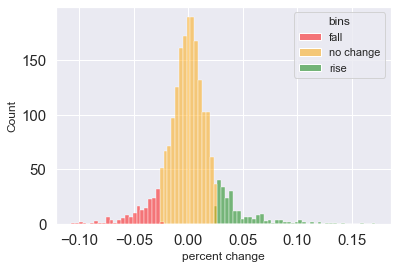

OVERALL
replies_count      -0.032858
urls               -0.020472
retweets_count     -0.016340
likes_count        -0.013635
mentions           -0.013363
number of tweets   -0.005633
price               0.020225
hashtags            0.021117
video               0.066649
photos              0.090454
percent change      1.000000
cashtags                 NaN
Name: percent change, dtype: float64


FALL
mentions           -0.103761
number of tweets   -0.050508
replies_count      -0.049074
urls               -0.025069
likes_count        -0.022592
retweets_count     -0.013485
price               0.005351
photos              0.061735
video               0.063397
percent change      1.000000
hashtags                 NaN
cashtags                 NaN
Name: percent change, dtype: float64


RISE
price              -0.085477
replies_count      -0.063249
hashtags           -0.058817
mentions           -0.044271
video              -0.023164
urls               -0.013024
number of tweets    0.014421
photo

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


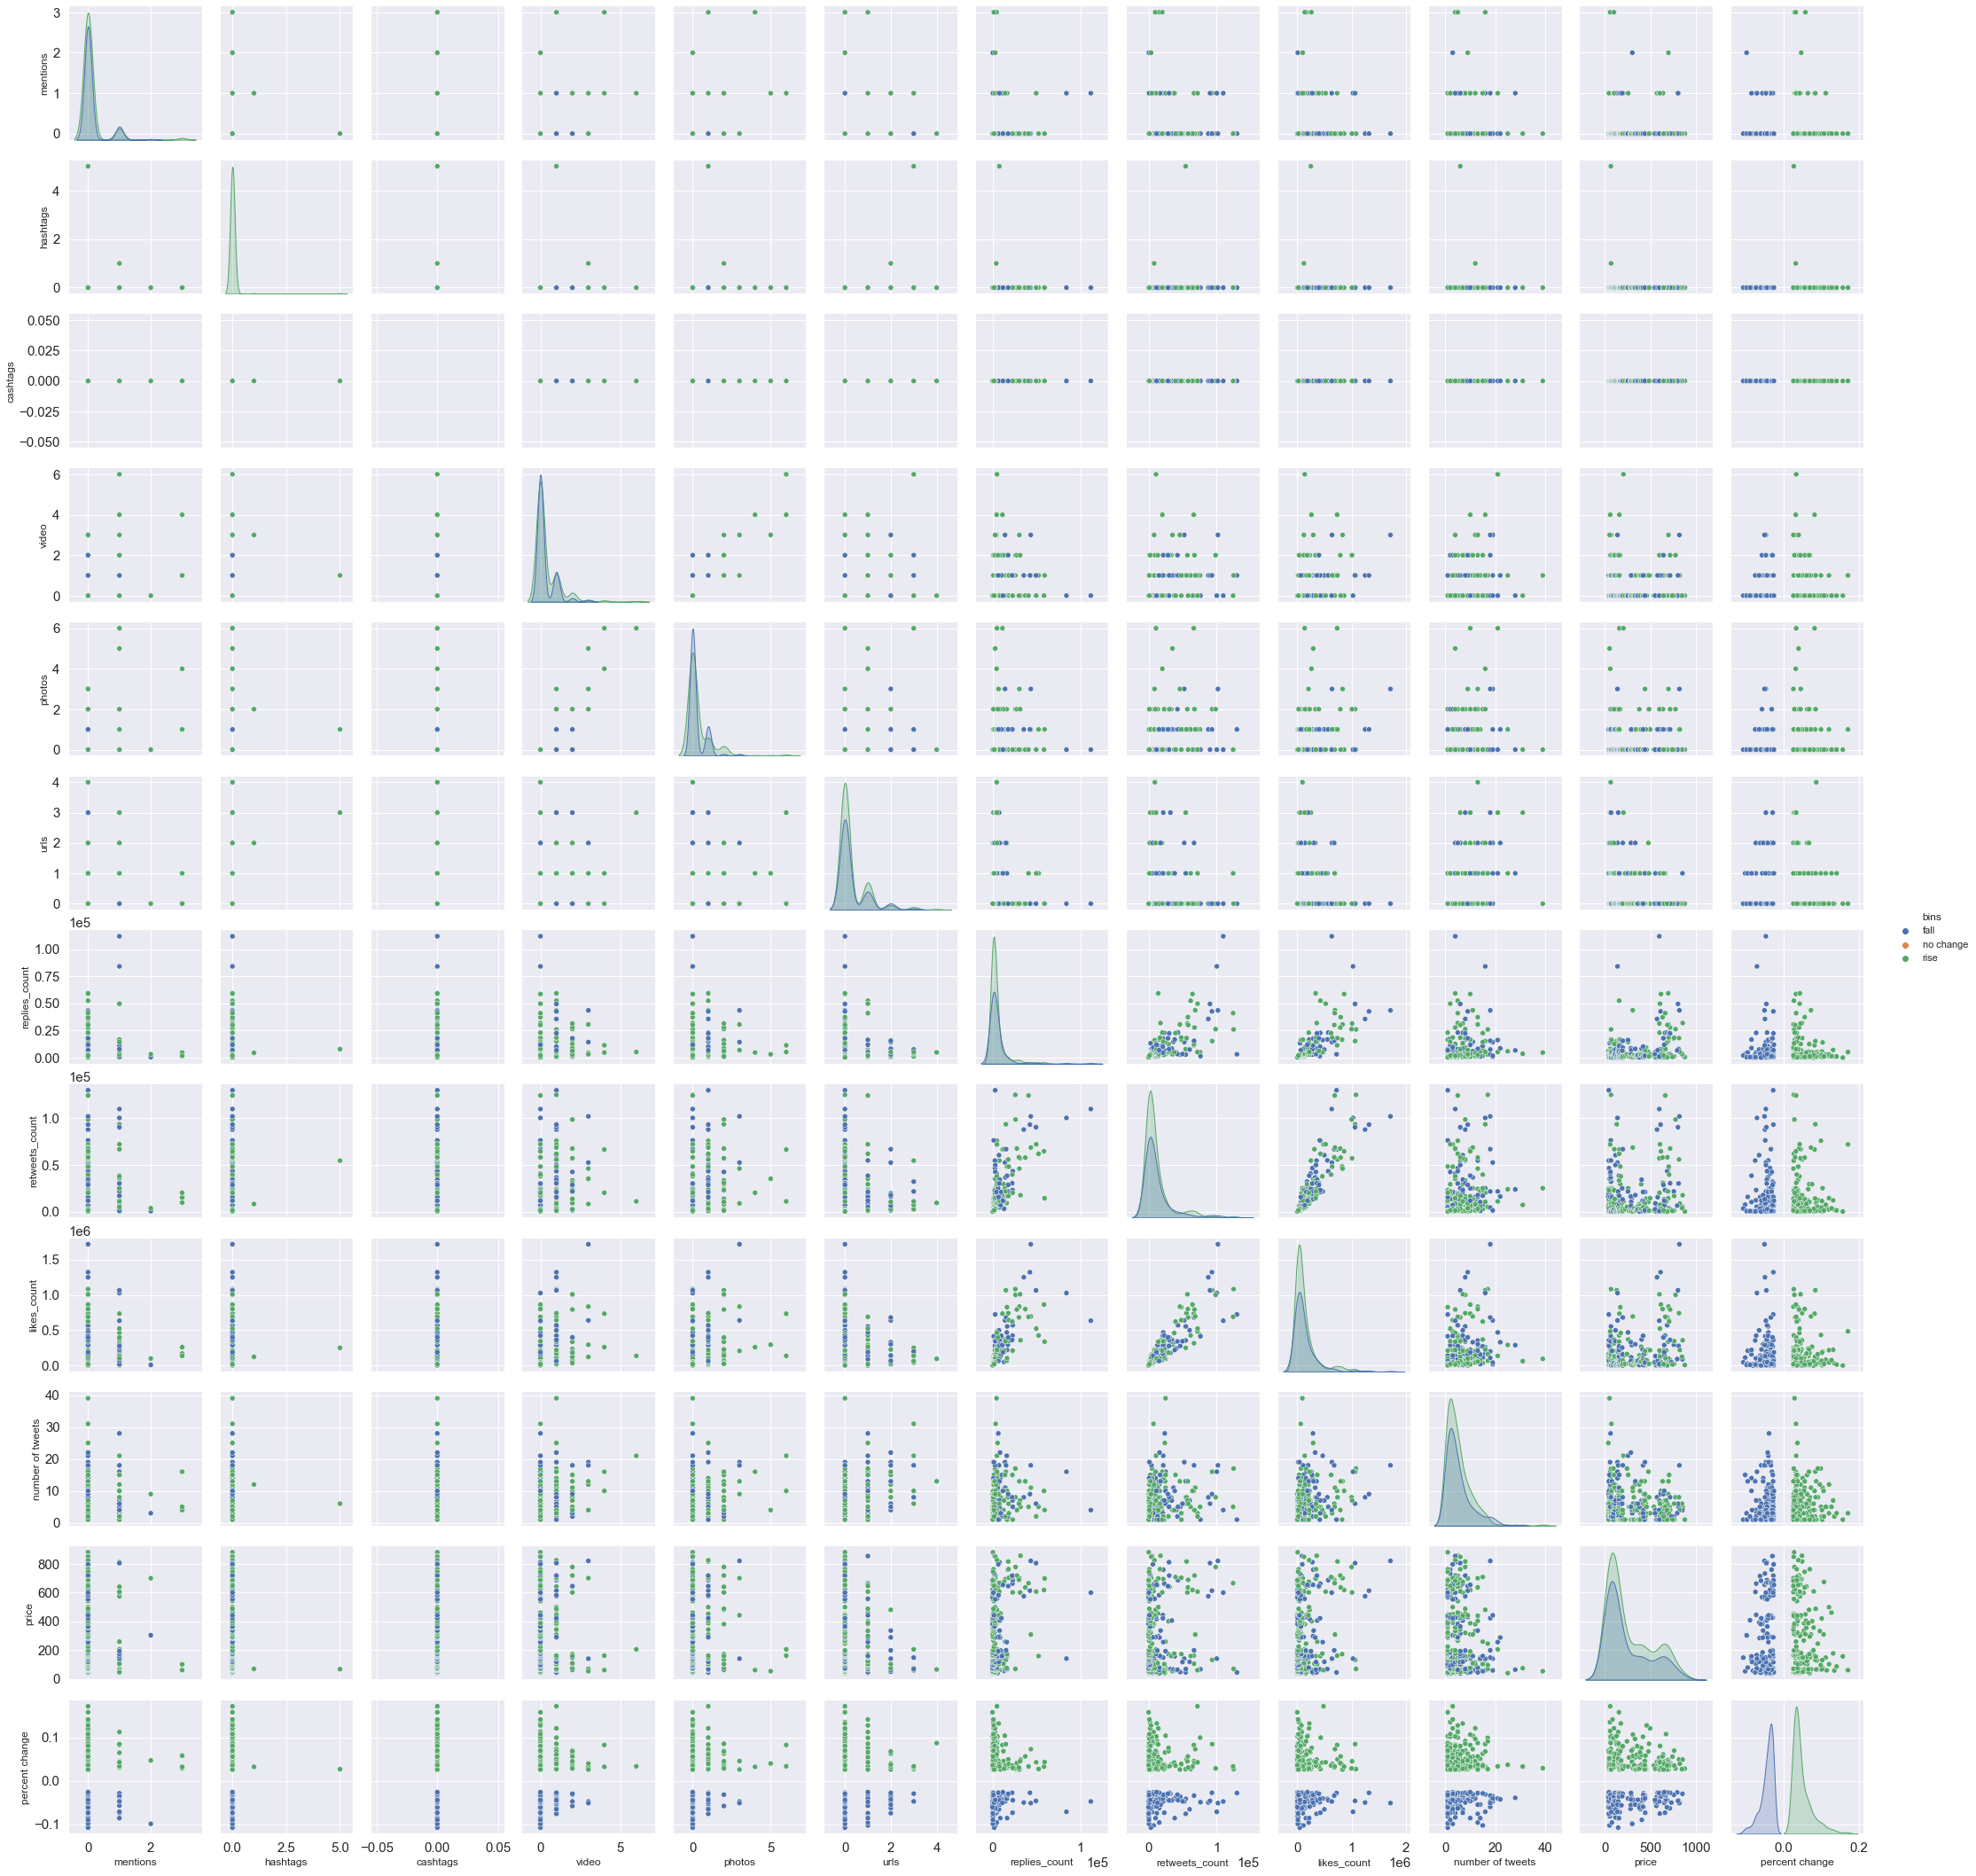

In [1467]:
user = 'elonmusk'
df = tweet_stocks[tweet_stocks['username'] == user]
bins = [df['percent change'].min(), -df['percent change'].std(), df['percent change'].std(), df['percent change'].max()]
df['bins'] = pd.cut(df['percent change'], bins=bins, labels = ['fall', 'no change', 'rise'])
print(df[['bins']].value_counts())
_ = sns.histplot(data=df, x='percent change', hue='bins', palette=['red', 'orange', 'green'])
plt.show()
df_new = df[df['bins'] != 'no change']
print('OVERALL')
print('============')
print(df_new.corr()['percent change'].sort_values())
print('\n')
print('FALL')
print('============')
print(df_new[df_new['bins'] == 'fall'].corr()['percent change'].sort_values())
print('\n')
print('RISE')
print('============')
print(df_new[df_new['bins'] == 'rise'].corr()['percent change'].sort_values())
_ = sns.pairplot(df[df['bins'] != 'no change'], hue='bins')
plt.show()

In [ ]:
#### i=1
df = df[df['username']==mapper[i][0]]
feature = 'mentions'
graph = sns.jointplot(data = df, x = 'percent change', y =feature, kind = 'reg', color=mapper[i][2])
plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.ylabel('count', fontsize=15)


In [ ]:

plt.figure(figsize=(13,12))
plt.subplot(211)


graph = sns.jointplot(data=df, x = 'percent change', y =feature, kind='reg', color='grey')
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(13,10))
    plt.subplot(221)

    graph = sns.jointplot(data = df[df['username']==mapper[i][0]], x = 'percent change', y =feature, kind='reg', color=mapper[i][2])
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


r, p = stats.pearsonr(x, y)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


mentions 
 
 
 
 
 mean 
 0.654267 
 
 
 std 
 0.760112 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 3.988984 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 5780 
 0.492 
 
 
 btwn_0_1_std 
 7700 
 0.656 
 
 
 btwn_1_2_std 
 2133 
 0.182 
 
 
 over_2_std 
 1905 
 0.162

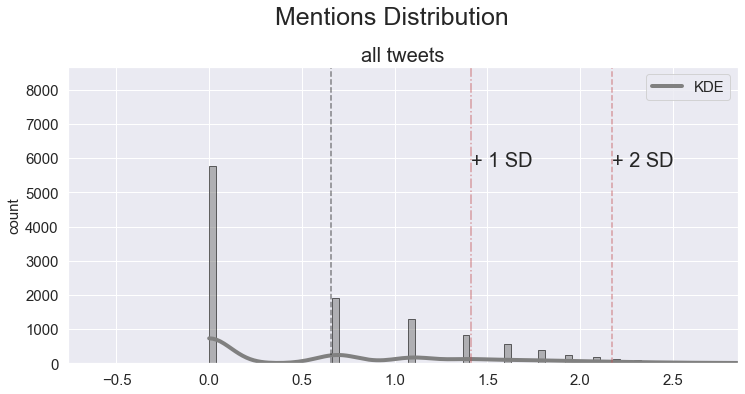

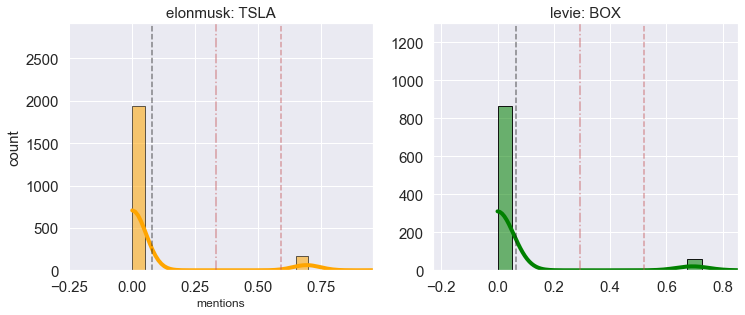

mentions 
 
 
 
 
 mean 
 0.080126 
 
 
 std 
 0.254872 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.302585 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1944 
 0.901 
 
 
 btwn_0_1_std 
 1944 
 0.901 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 213 
 0.099 
 
 
 
 
 
 
 mentions 
 
 
 
 
 mean 
 0.065615 
 
 
 std 
 0.227692 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.609438 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 866 
 0.918 
 
 
 btwn_0_1_std 
 866 
 0.918 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 77 
 0.082

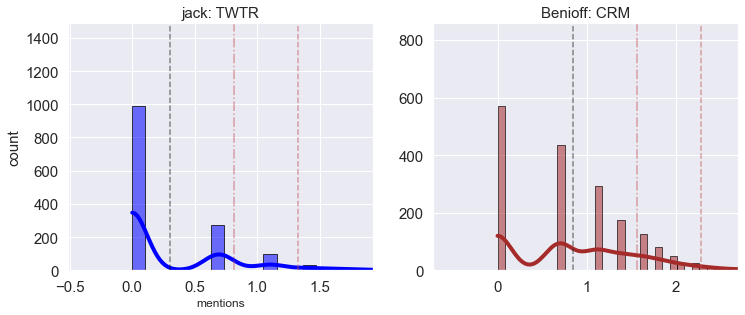

mentions 
 
 
 
 
 mean 
 0.301780 
 
 
 std 
 0.512616 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.693147 
 
 
 max 
 3.988984 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 992 
 0.688 
 
 
 btwn_0_1_std 
 992 
 0.688 
 
 
 btwn_1_2_std 
 273 
 0.189 
 
 
 over_2_std 
 177 
 0.123 
 
 
 
 
 
 
 mentions 
 
 
 
 
 mean 
 0.849357 
 
 
 std 
 0.719522 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.386294 
 
 
 max 
 3.610918 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 572 
 0.312 
 
 
 btwn_0_1_std 
 1007 
 0.548 
 
 
 btwn_1_2_std 
 466 
 0.254 
 
 
 over_2_std 
 363 
 0.198

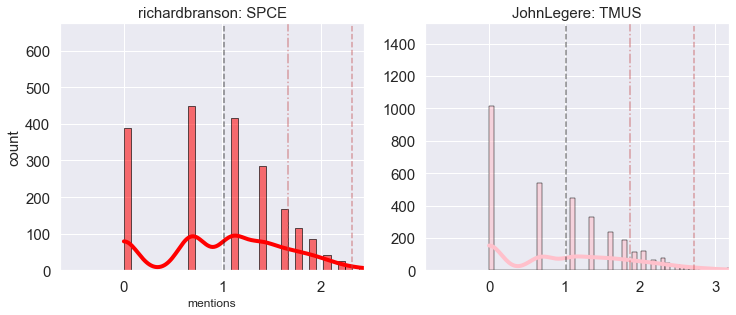

mentions 
 
 
 
 
 mean 
 1.012086 
 
 
 std 
 0.650913 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.386294 
 
 
 max 
 3.258097 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 389 
 0.194 
 
 
 btwn_0_1_std 
 389 
 0.194 
 
 
 btwn_1_2_std 
 866 
 0.431 
 
 
 over_2_std 
 754 
 0.375 
 
 
 
 
 
 
 mentions 
 
 
 
 
 mean 
 1.019760 
 
 
 std 
 0.850159 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.609438 
 
 
 max 
 3.663562 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 1017 
 0.303 
 
 
 btwn_0_1_std 
 1553 
 0.463 
 
 
 btwn_1_2_std 
 1015 
 0.303 
 
 
 over_2_std 
 783 
 0.234

In [1393]:
df = eda_df
feature = features[0]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=True, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


hashtags 
 
 
 
 
 mean 
 0.505255 
 
 
 std 
 0.742554 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 1.098612 
 
 
 max 
 3.761200 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 7273 
 0.62 
 
 
 btwn_0_1_std 
 8710 
 0.742 
 
 
 btwn_1_2_std 
 1439 
 0.123 
 
 
 over_2_std 
 1589 
 0.135

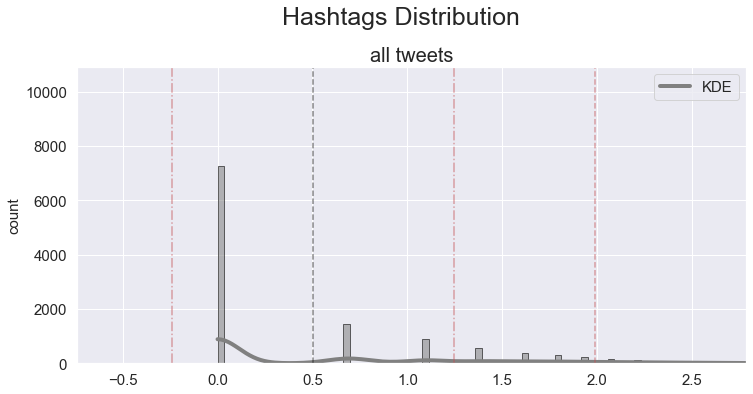

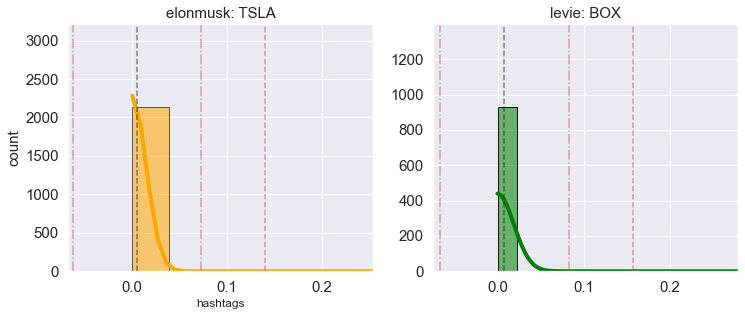

hashtags 
 
 
 
 
 mean 
 0.005330 
 
 
 std 
 0.067679 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.791759 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 2142 
 0.993 
 
 
 btwn_0_1_std 
 2142 
 0.993 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 15 
 0.007 
 
 
 
 
 
 
 hashtags 
 
 
 
 
 mean 
 0.008085 
 
 
 std 
 0.074464 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 0.693147 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 932 
 0.988 
 
 
 btwn_0_1_std 
 932 
 0.988 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 11 
 0.012

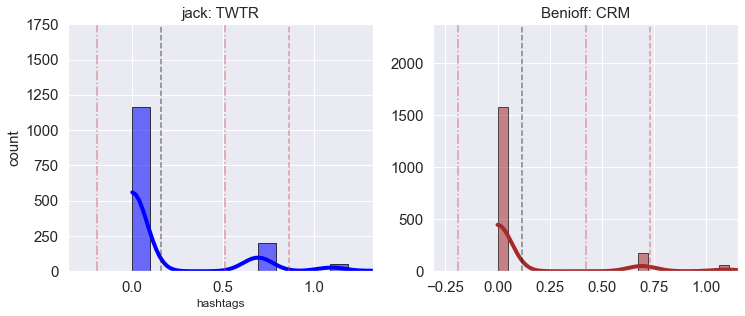

hashtags 
 
 
 
 
 mean 
 0.158788 
 
 
 std 
 0.353284 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 3.761200 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1168 
 0.81 
 
 
 btwn_0_1_std 
 1168 
 0.81 
 
 
 btwn_1_2_std 
 202 
 0.14 
 
 
 over_2_std 
 72 
 0.05 
 
 
 
 
 
 
 hashtags 
 
 
 
 
 mean 
 0.117078 
 
 
 std 
 0.307880 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.079442 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 1582 
 0.862 
 
 
 btwn_0_1_std 
 1582 
 0.862 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 254 
 0.138

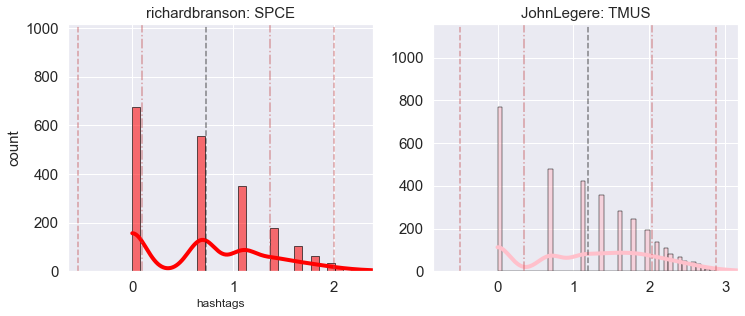

hashtags 
 
 
 
 
 mean 
 0.731992 
 
 
 std 
 0.634637 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 3.610918 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 678 
 0.337 
 
 
 btwn_0_1_std 
 678 
 0.337 
 
 
 btwn_1_2_std 
 905 
 0.45 
 
 
 over_2_std 
 426 
 0.212 
 
 
 
 
 
 
 hashtags 
 
 
 
 
 mean 
 1.192797 
 
 
 std 
 0.843714 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.386294 
 
 
 75% 
 1.791759 
 
 
 max 
 3.526361 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 771 
 0.23 
 
 
 btwn_0_1_std 
 1248 
 0.372 
 
 
 btwn_1_2_std 
 1062 
 0.317 
 
 
 over_2_std 
 1041 
 0.311

In [1389]:
df = eda_df
feature = features[1]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

cashtags 
 
 
 
 
 mean 
 0.008073 
 
 
 std 
 0.107846 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.833213 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 11655 
 0.993 
 
 
 btwn_0_1_std 
 11655 
 0.993 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 83 
 0.007

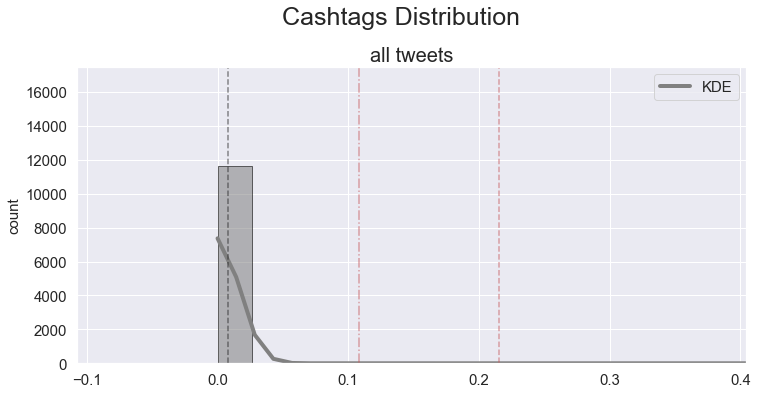

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-1258-7a91aa582532>:30: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  plt.xlim(-1*std, 3.75*std)


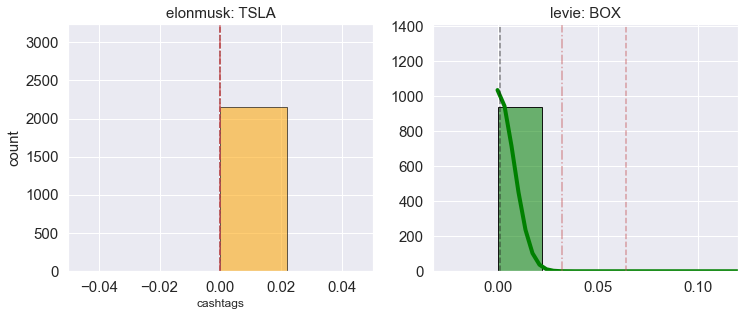

cashtags 
 
 
 
 
 mean 
 0.0 
 
 
 std 
 0.0 
 
 
 min 
 0.0 
 
 
 25% 
 0.0 
 
 
 50% 
 0.0 
 
 
 75% 
 0.0 
 
 
 max 
 0.0 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 2157 
 1.0 
 
 
 btwn_0_1_std 
 2157 
 1.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 0 
 0.0 
 
 
 
 
 
 
 cashtags 
 
 
 
 
 mean 
 0.001470 
 
 
 std 
 0.031905 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 0.693147 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 941 
 0.998 
 
 
 btwn_0_1_std 
 941 
 0.998 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 2 
 0.002

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-1258-7a91aa582532>:30: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  plt.xlim(-1*std, 3.75*std)


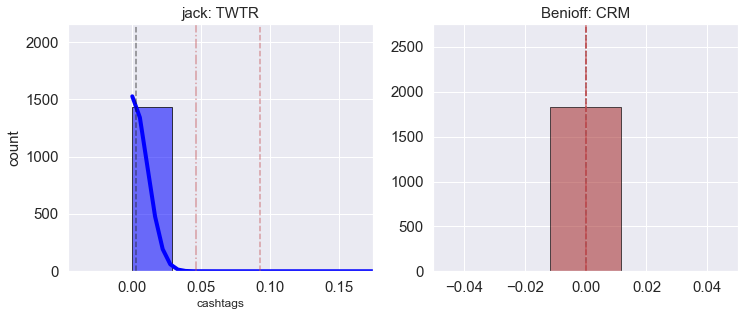

cashtags 
 
 
 
 
 mean 
 0.002685 
 
 
 std 
 0.046519 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.098612 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1437 
 0.997 
 
 
 btwn_0_1_std 
 1437 
 0.997 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 5 
 0.003 
 
 
 
 
 
 
 cashtags 
 
 
 
 
 mean 
 0.0 
 
 
 std 
 0.0 
 
 
 min 
 0.0 
 
 
 25% 
 0.0 
 
 
 50% 
 0.0 
 
 
 75% 
 0.0 
 
 
 max 
 0.0 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 1836 
 1.0 
 
 
 btwn_0_1_std 
 1836 
 1.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 0 
 0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-1258-7a91aa582532>:30: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  plt.xlim(-1*std, 3.75*std)


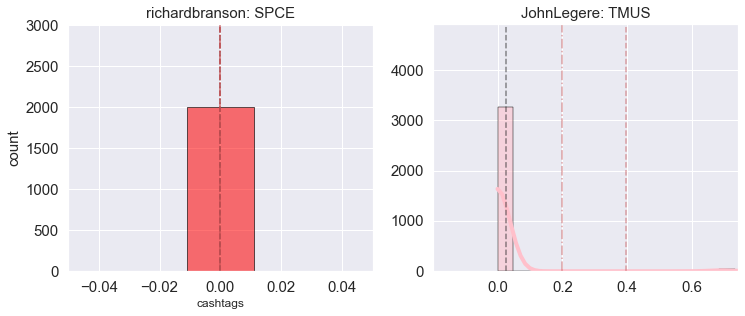

cashtags 
 
 
 
 
 mean 
 0.0 
 
 
 std 
 0.0 
 
 
 min 
 0.0 
 
 
 25% 
 0.0 
 
 
 50% 
 0.0 
 
 
 75% 
 0.0 
 
 
 max 
 0.0 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 2009 
 1.0 
 
 
 btwn_0_1_std 
 2009 
 1.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 0 
 0.0 
 
 
 
 
 
 
 cashtags 
 
 
 
 
 mean 
 0.026709 
 
 
 std 
 0.197595 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.833213 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 3275 
 0.977 
 
 
 btwn_0_1_std 
 3275 
 0.977 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 76 
 0.023

In [1369]:
df = eda_df
feature = features[2]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2


video 
 
 
 
 
 mean 
 0.686468 
 
 
 std 
 0.710302 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 3.610918 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 5100 
 0.434 
 
 
 btwn_0_1_std 
 7494 
 0.638 
 
 
 btwn_1_2_std 
 2385 
 0.203 
 
 
 over_2_std 
 1859 
 0.158

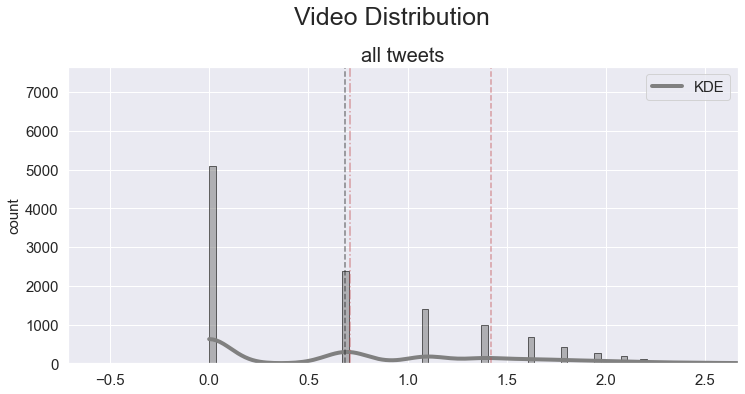

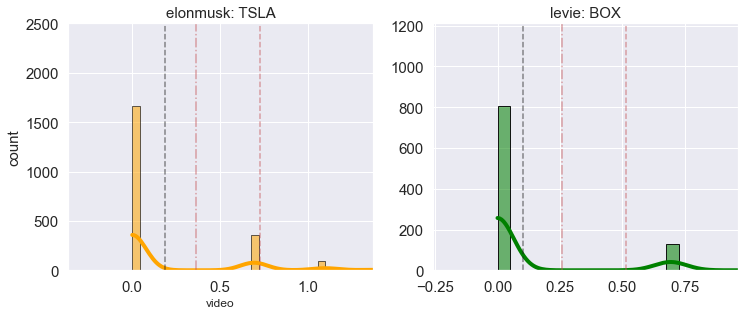

video 
 
 
 
 
 mean 
 0.187628 
 
 
 std 
 0.364849 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.945910 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1668 
 0.773 
 
 
 btwn_0_1_std 
 1668 
 0.773 
 
 
 btwn_1_2_std 
 357 
 0.166 
 
 
 over_2_std 
 132 
 0.061 
 
 
 
 
 
 
 video 
 
 
 
 
 mean 
 0.103088 
 
 
 std 
 0.256598 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.609438 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 808 
 0.857 
 
 
 btwn_0_1_std 
 808 
 0.857 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 135 
 0.143

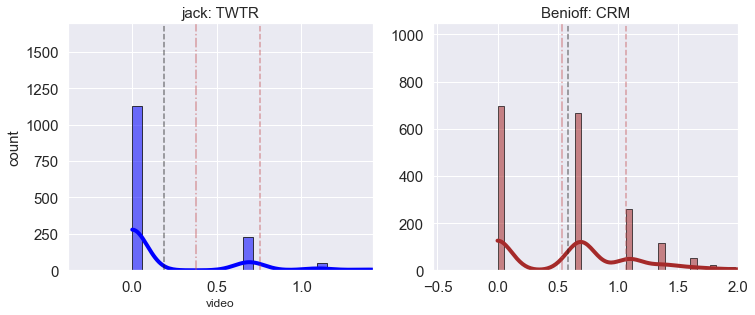

video 
 
 
 
 
 mean 
 0.185238 
 
 
 std 
 0.378973 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.079442 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1130 
 0.784 
 
 
 btwn_0_1_std 
 1130 
 0.784 
 
 
 btwn_1_2_std 
 226 
 0.157 
 
 
 over_2_std 
 86 
 0.06 
 
 
 
 
 
 
 video 
 
 
 
 
 mean 
 0.585850 
 
 
 std 
 0.533806 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 2.302585 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 698 
 0.38 
 
 
 btwn_0_1_std 
 698 
 0.38 
 
 
 btwn_1_2_std 
 667 
 0.363 
 
 
 over_2_std 
 471 
 0.257

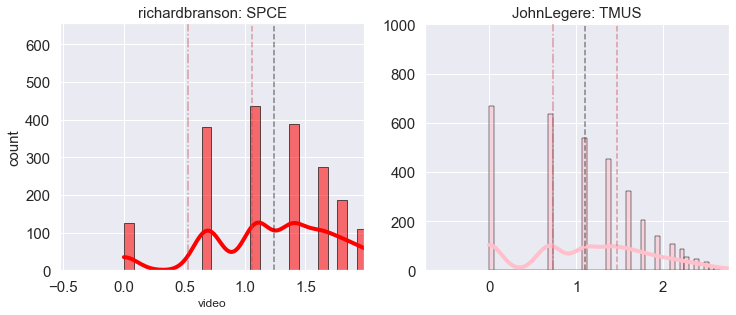

video 
 
 
 
 
 mean 
 1.244894 
 
 
 std 
 0.529686 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.386294 
 
 
 75% 
 1.609438 
 
 
 max 
 3.610918 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 126 
 0.063 
 
 
 btwn_0_1_std 
 126 
 0.063 
 
 
 btwn_1_2_std 
 380 
 0.189 
 
 
 over_2_std 
 1503 
 0.748 
 
 
 
 
 
 
 video 
 
 
 
 
 mean 
 1.107760 
 
 
 std 
 0.737003 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.609438 
 
 
 max 
 3.258097 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 670 
 0.2 
 
 
 btwn_0_1_std 
 1306 
 0.39 
 
 
 btwn_1_2_std 
 989 
 0.295 
 
 
 over_2_std 
 1056 
 0.315

In [1370]:
df = eda_df
feature = features[3]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

photos 
 
 
 
 
 mean 
 0.674721 
 
 
 std 
 0.738868 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.386294 
 
 
 max 
 3.258097 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 5477 
 0.467 
 
 
 btwn_0_1_std 
 7581 
 0.646 
 
 
 btwn_1_2_std 
 2106 
 0.179 
 
 
 over_2_std 
 2051 
 0.175

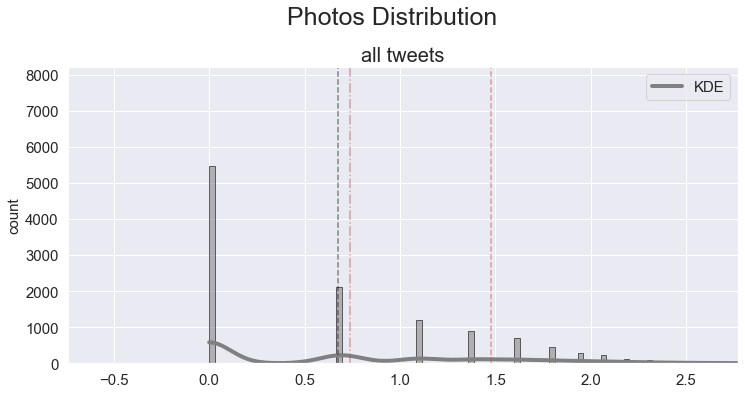

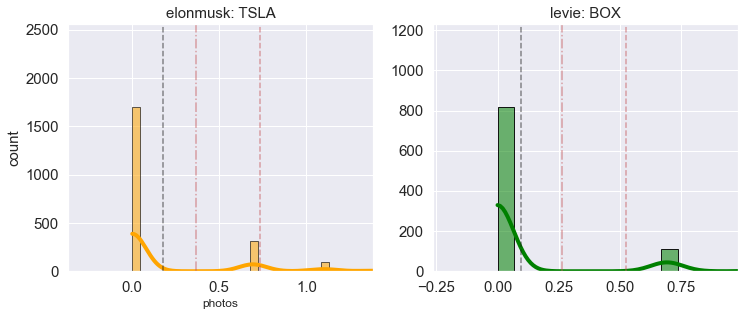

photos 
 
 
 
 
 mean 
 0.178338 
 
 
 std 
 0.368128 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.079442 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1706 
 0.791 
 
 
 btwn_0_1_std 
 1706 
 0.791 
 
 
 btwn_1_2_std 
 314 
 0.146 
 
 
 over_2_std 
 137 
 0.064 
 
 
 
 
 
 
 photos 
 
 
 
 
 mean 
 0.097887 
 
 
 std 
 0.262116 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.079442 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 820 
 0.87 
 
 
 btwn_0_1_std 
 820 
 0.87 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 123 
 0.13

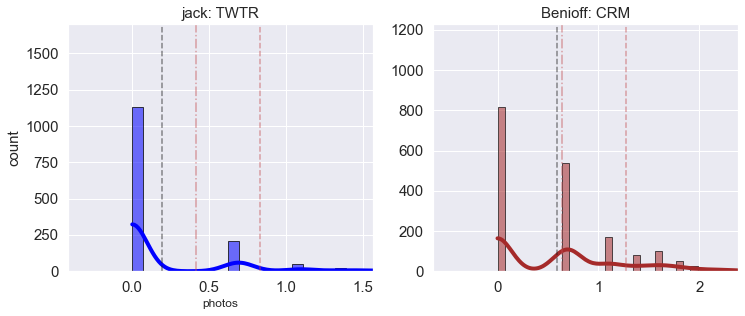

photos 
 
 
 
 
 mean 
 0.196124 
 
 
 std 
 0.416993 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 2.639057 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 1134 
 0.786 
 
 
 btwn_0_1_std 
 1134 
 0.786 
 
 
 btwn_1_2_std 
 208 
 0.144 
 
 
 over_2_std 
 100 
 0.069 
 
 
 
 
 
 
 photos 
 
 
 
 
 mean 
 0.590183 
 
 
 std 
 0.635137 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 3.044522 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 819 
 0.446 
 
 
 btwn_0_1_std 
 819 
 0.446 
 
 
 btwn_1_2_std 
 710 
 0.387 
 
 
 over_2_std 
 307 
 0.167

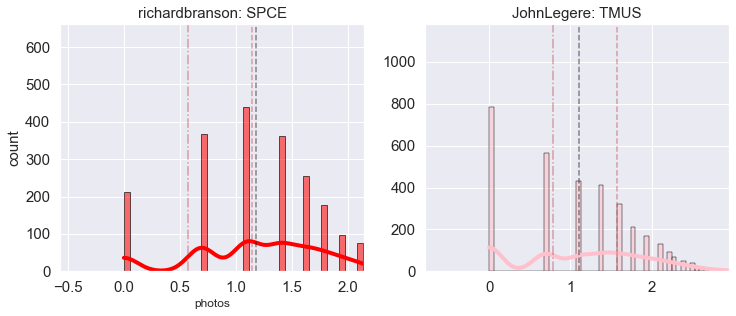

photos 
 
 
 
 
 mean 
 1.178043 
 
 
 std 
 0.572026 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.609438 
 
 
 max 
 2.397895 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 211 
 0.105 
 
 
 btwn_0_1_std 
 211 
 0.105 
 
 
 btwn_1_2_std 
 808 
 0.402 
 
 
 over_2_std 
 990 
 0.493 
 
 
 
 
 
 
 photos 
 
 
 
 
 mean 
 1.107077 
 
 
 std 
 0.787736 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.609438 
 
 
 max 
 3.258097 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 787 
 0.235 
 
 
 btwn_0_1_std 
 1353 
 0.404 
 
 
 btwn_1_2_std 
 844 
 0.252 
 
 
 over_2_std 
 1154 
 0.344

In [1371]:
df = eda_df
feature = features[4]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

urls 
 
 
 
 
 mean 
 0.716262 
 
 
 std 
 0.654074 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 3.496508 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 4334 
 0.369 
 
 
 btwn_0_1_std 
 4334 
 0.369 
 
 
 btwn_1_2_std 
 4719 
 0.402 
 
 
 over_2_std 
 2685 
 0.229

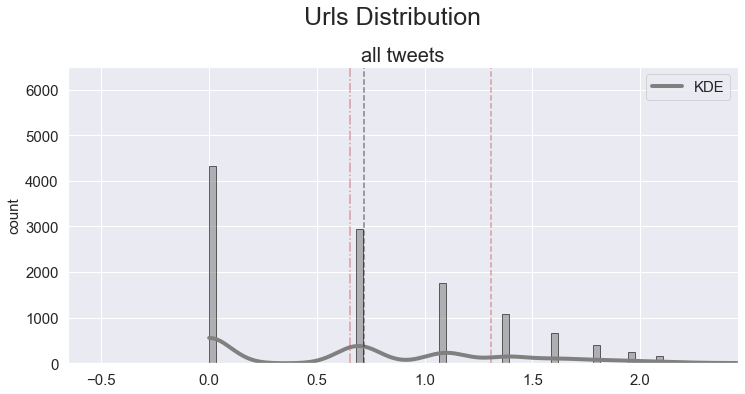

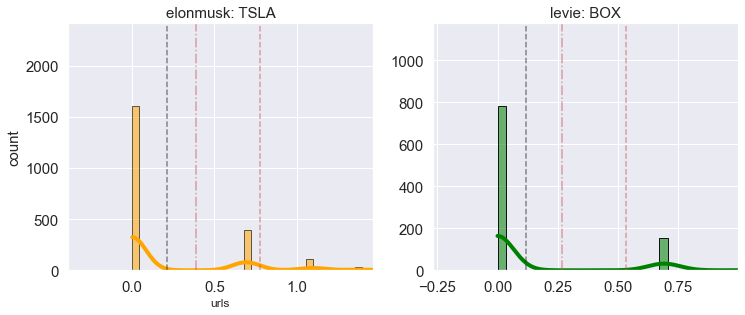

urls 
 
 
 
 
 mean 
 0.214153 
 
 
 std 
 0.389746 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.693147 
 
 
 max 
 1.945910 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 1609 
 0.746 
 
 
 btwn_0_1_std 
 1609 
 0.746 
 
 
 btwn_1_2_std 
 391 
 0.181 
 
 
 over_2_std 
 157 
 0.073 
 
 
 
 
 
 
 urls 
 
 
 
 
 mean 
 0.118717 
 
 
 std 
 0.266654 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.000000 
 
 
 max 
 1.098612 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 785 
 0.832 
 
 
 btwn_0_1_std 
 785 
 0.832 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 158 
 0.168

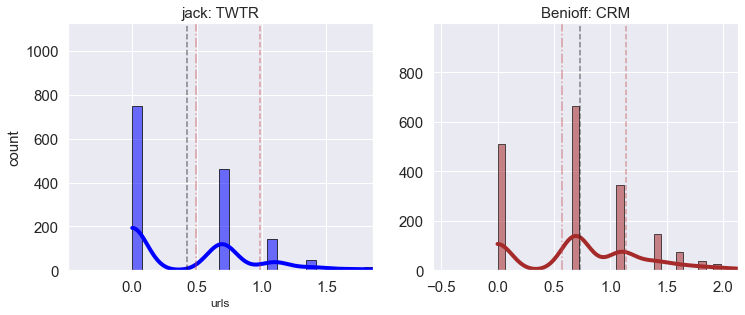

urls 
 
 
 
 
 mean 
 0.424624 
 
 
 std 
 0.495149 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.000000 
 
 
 75% 
 0.693147 
 
 
 max 
 2.833213 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 751 
 0.521 
 
 
 btwn_0_1_std 
 751 
 0.521 
 
 
 btwn_1_2_std 
 463 
 0.321 
 
 
 over_2_std 
 228 
 0.158 
 
 
 
 
 
 
 urls 
 
 
 
 
 mean 
 0.734786 
 
 
 std 
 0.567870 
 
 
 min 
 0.000000 
 
 
 25% 
 0.000000 
 
 
 50% 
 0.693147 
 
 
 75% 
 1.098612 
 
 
 max 
 2.833213 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 511 
 0.278 
 
 
 btwn_0_1_std 
 511 
 0.278 
 
 
 btwn_1_2_std 
 1010 
 0.55 
 
 
 over_2_std 
 315 
 0.172

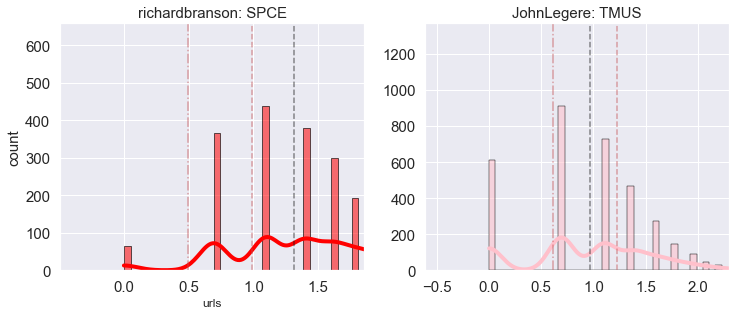

urls 
 
 
 
 
 mean 
 1.311634 
 
 
 std 
 0.494942 
 
 
 min 
 0.000000 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.386294 
 
 
 75% 
 1.609438 
 
 
 max 
 2.397895 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 65 
 0.032 
 
 
 btwn_0_1_std 
 65 
 0.032 
 
 
 btwn_1_2_std 
 367 
 0.183 
 
 
 over_2_std 
 1577 
 0.785 
 
 
 
 
 
 
 urls 
 
 
 
 
 mean 
 0.966027 
 
 
 std 
 0.614470 
 
 
 min 
 0.000000 
 
 
 25% 
 0.693147 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.386294 
 
 
 max 
 3.496508 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 613 
 0.183 
 
 
 btwn_0_1_std 
 613 
 0.183 
 
 
 btwn_1_2_std 
 1639 
 0.489 
 
 
 over_2_std 
 1099 
 0.328

In [1372]:
df = eda_df
feature = features[5]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

replies_count 
 
 
 
 
 mean 
 4.543305 
 
 
 std 
 1.948625 
 
 
 min 
 0.000000 
 
 
 25% 
 3.332205 
 
 
 50% 
 4.369448 
 
 
 75% 
 5.468060 
 
 
 max 
 12.227908 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 100 
 0.009 
 
 
 btwn_0_1_std 
 965 
 0.082 
 
 
 btwn_1_2_std 
 3453 
 0.294 
 
 
 over_2_std 
 7320 
 0.624

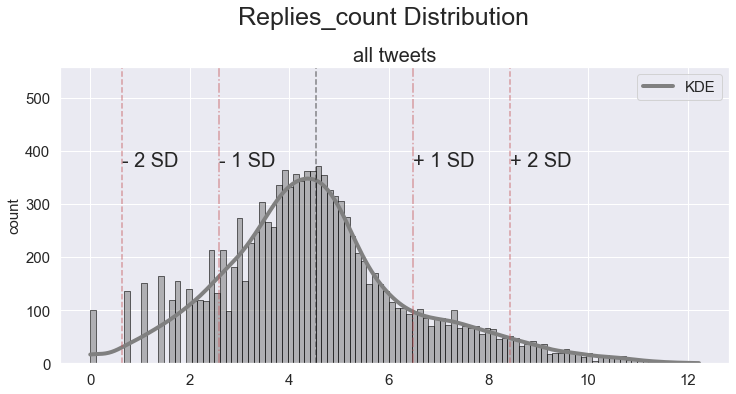

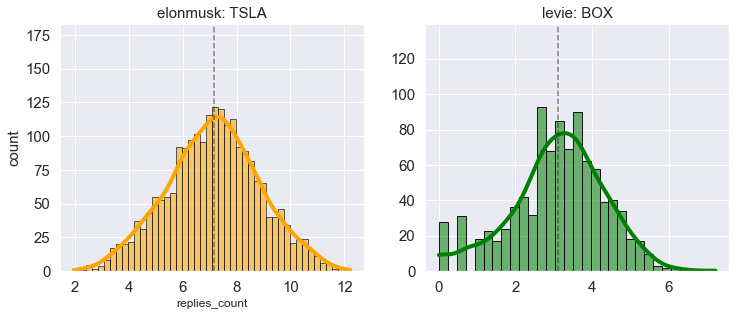

replies_count 
 
 
 
 
 mean 
 7.151971 
 
 
 std 
 1.720410 
 
 
 min 
 1.945910 
 
 
 25% 
 6.011267 
 
 
 50% 
 7.180070 
 
 
 75% 
 8.298042 
 
 
 max 
 12.227908 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 35 
 0.016 
 
 
 over_2_std 
 2122 
 0.984 
 
 
 
 
 
 
 replies_count 
 
 
 
 
 mean 
 3.108127 
 
 
 std 
 1.222864 
 
 
 min 
 0.000000 
 
 
 25% 
 2.484907 
 
 
 50% 
 3.178054 
 
 
 75% 
 3.881511 
 
 
 max 
 7.225481 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 28 
 0.03 
 
 
 btwn_0_1_std 
 77 
 0.082 
 
 
 btwn_1_2_std 
 157 
 0.166 
 
 
 over_2_std 
 709 
 0.752

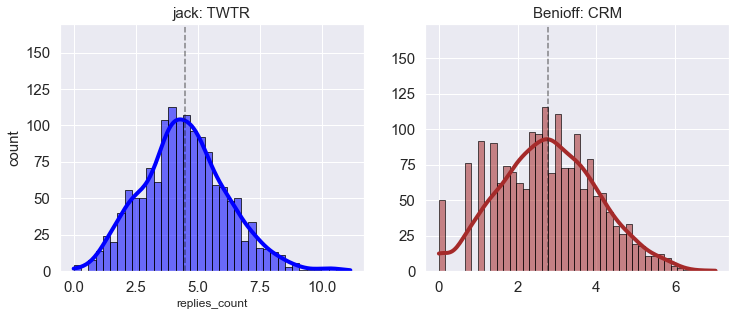

replies_count 
 
 
 
 
 mean 
 4.468252 
 
 
 std 
 1.716818 
 
 
 min 
 0.000000 
 
 
 25% 
 3.332205 
 
 
 50% 
 4.406719 
 
 
 75% 
 5.500236 
 
 
 max 
 11.132777 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 4 
 0.003 
 
 
 btwn_0_1_std 
 70 
 0.049 
 
 
 btwn_1_2_std 
 308 
 0.214 
 
 
 over_2_std 
 1064 
 0.738 
 
 
 
 
 
 
 replies_count 
 
 
 
 
 mean 
 2.775630 
 
 
 std 
 1.261825 
 
 
 min 
 0.000000 
 
 
 25% 
 1.945910 
 
 
 50% 
 2.772589 
 
 
 75% 
 3.610918 
 
 
 max 
 7.026427 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 50 
 0.027 
 
 
 btwn_0_1_std 
 218 
 0.119 
 
 
 btwn_1_2_std 
 557 
 0.303 
 
 
 over_2_std 
 1061 
 0.578

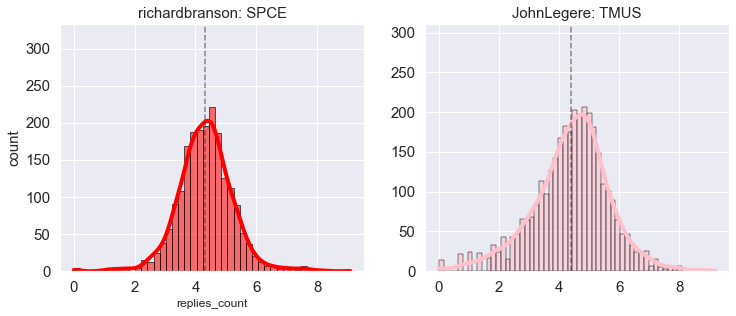

replies_count 
 
 
 
 
 mean 
 4.326400 
 
 
 std 
 0.900796 
 
 
 min 
 0.000000 
 
 
 25% 
 3.806662 
 
 
 50% 
 4.317488 
 
 
 75% 
 4.836282 
 
 
 max 
 9.084550 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 4 
 0.002 
 
 
 btwn_0_1_std 
 4 
 0.002 
 
 
 btwn_1_2_std 
 16 
 0.008 
 
 
 over_2_std 
 1989 
 0.99 
 
 
 
 
 
 
 replies_count 
 
 
 
 
 mean 
 4.398846 
 
 
 std 
 1.275272 
 
 
 min 
 0.000000 
 
 
 25% 
 3.713572 
 
 
 50% 
 4.510860 
 
 
 75% 
 5.164786 
 
 
 max 
 9.201804 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 14 
 0.004 
 
 
 btwn_0_1_std 
 60 
 0.018 
 
 
 btwn_1_2_std 
 199 
 0.059 
 
 
 over_2_std 
 3092 
 0.923

In [1397]:
df = eda_df
feature = features[6]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=True, plot_std=True, truncate=False)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, truncate=False)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, truncate=False)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

retweets_count 
 
 
 
 
 mean 
 5.182438 
 
 
 std 
 2.077937 
 
 
 min 
 0.000000 
 
 
 25% 
 3.988984 
 
 
 50% 
 5.010635 
 
 
 75% 
 6.086775 
 
 
 max 
 13.275030 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 137 
 0.012 
 
 
 btwn_0_1_std 
 619 
 0.053 
 
 
 btwn_1_2_std 
 2708 
 0.231 
 
 
 over_2_std 
 8411 
 0.717

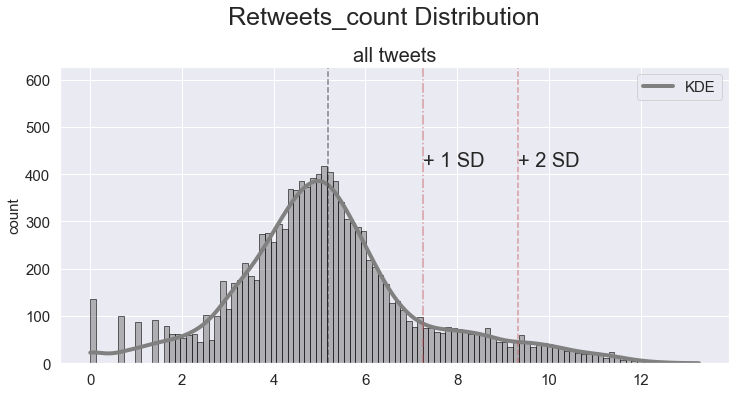

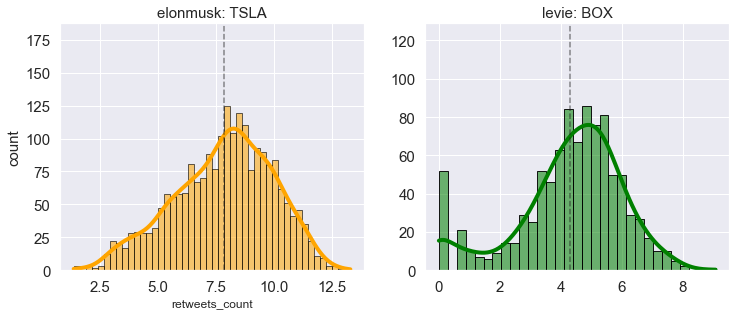

retweets_count 
 
 
 
 
 mean 
 7.830236 
 
 
 std 
 2.117422 
 
 
 min 
 1.386294 
 
 
 25% 
 6.406880 
 
 
 50% 
 8.021256 
 
 
 75% 
 9.397235 
 
 
 max 
 13.275030 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 6 
 0.003 
 
 
 btwn_1_2_std 
 134 
 0.062 
 
 
 over_2_std 
 2017 
 0.935 
 
 
 
 
 
 
 retweets_count 
 
 
 
 
 mean 
 4.296493 
 
 
 std 
 1.742296 
 
 
 min 
 0.000000 
 
 
 25% 
 3.496508 
 
 
 50% 
 4.564348 
 
 
 75% 
 5.429346 
 
 
 max 
 9.067393 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 52 
 0.055 
 
 
 btwn_0_1_std 
 96 
 0.102 
 
 
 btwn_1_2_std 
 139 
 0.147 
 
 
 over_2_std 
 708 
 0.751

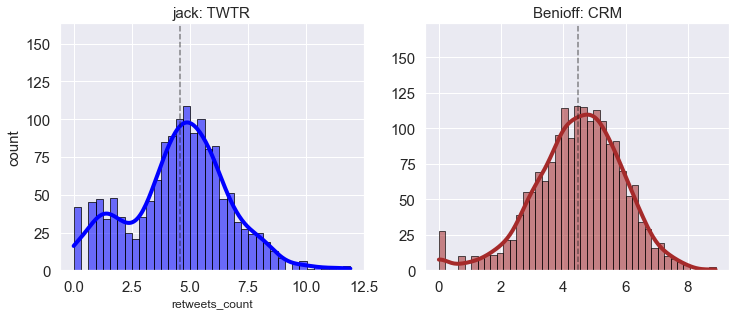

retweets_count 
 
 
 
 
 mean 
 4.563644 
 
 
 std 
 2.160500 
 
 
 min 
 0.000000 
 
 
 25% 
 3.332205 
 
 
 50% 
 4.736198 
 
 
 75% 
 5.907403 
 
 
 max 
 11.928922 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 42 
 0.029 
 
 
 btwn_0_1_std 
 238 
 0.165 
 
 
 btwn_1_2_std 
 350 
 0.243 
 
 
 over_2_std 
 854 
 0.592 
 
 
 
 
 
 
 retweets_count 
 
 
 
 
 mean 
 4.477891 
 
 
 std 
 1.425547 
 
 
 min 
 0.000000 
 
 
 25% 
 3.637586 
 
 
 50% 
 4.564348 
 
 
 75% 
 5.442418 
 
 
 max 
 8.887376 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 28 
 0.015 
 
 
 btwn_0_1_std 
 57 
 0.031 
 
 
 btwn_1_2_std 
 159 
 0.087 
 
 
 over_2_std 
 1620 
 0.882

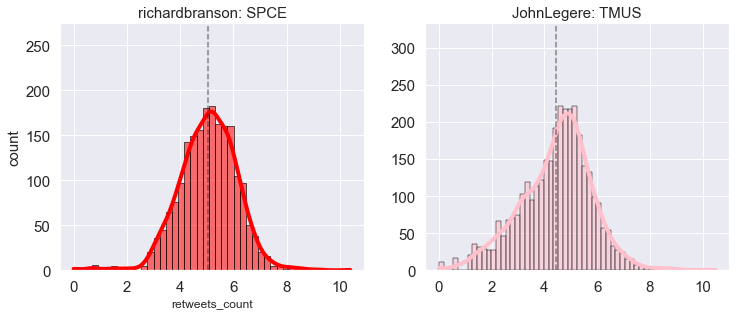

retweets_count 
 
 
 
 
 mean 
 5.058233 
 
 
 std 
 1.083018 
 
 
 min 
 0.000000 
 
 
 25% 
 4.382027 
 
 
 50% 
 5.093750 
 
 
 75% 
 5.786897 
 
 
 max 
 10.393876 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 4 
 0.002 
 
 
 btwn_0_1_std 
 10 
 0.005 
 
 
 btwn_1_2_std 
 10 
 0.005 
 
 
 over_2_std 
 1989 
 0.99 
 
 
 
 
 
 
 retweets_count 
 
 
 
 
 mean 
 4.454154 
 
 
 std 
 1.361236 
 
 
 min 
 0.000000 
 
 
 25% 
 3.610918 
 
 
 50% 
 4.615121 
 
 
 75% 
 5.313206 
 
 
 max 
 10.490079 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 11 
 0.003 
 
 
 btwn_0_1_std 
 48 
 0.014 
 
 
 btwn_1_2_std 
 331 
 0.099 
 
 
 over_2_std 
 2972 
 0.887

In [1395]:
df = eda_df
feature = features[7]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=True, plot_std=True, truncate=False)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=False, truncate=False)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=False, truncate=False)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

likes_count 
 
 
 
 
 mean 
 7.193010 
 
 
 std 
 2.162361 
 
 
 min 
 0.000000 
 
 
 25% 
 5.968708 
 
 
 50% 
 6.879870 
 
 
 75% 
 7.943339 
 
 
 max 
 15.368865 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 6 
 0.001 
 
 
 btwn_0_1_std 
 91 
 0.008 
 
 
 btwn_1_2_std 
 596 
 0.051 
 
 
 over_2_std 
 11051 
 0.941

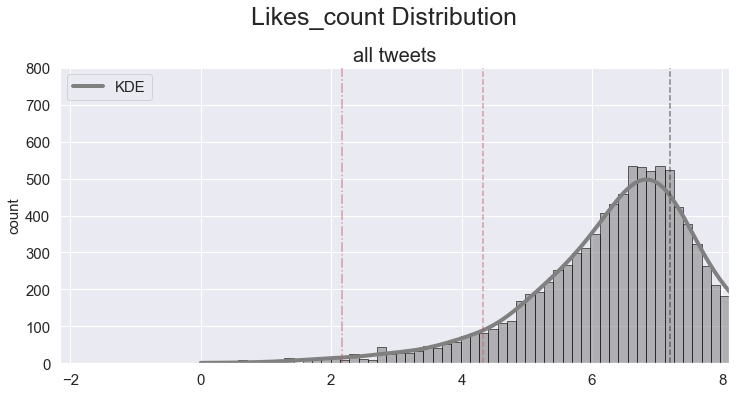

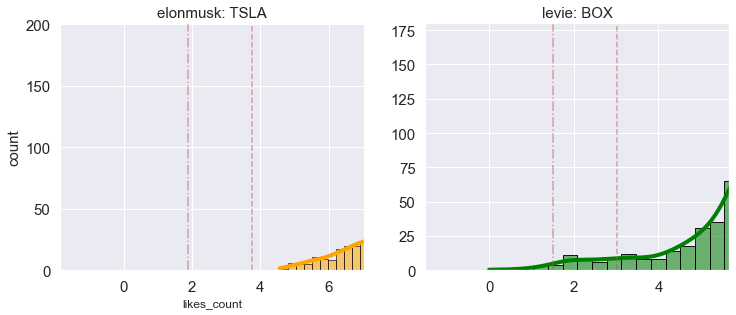

likes_count 
 
 
 
 
 mean 
 10.472624 
 
 
 std 
 1.878236 
 
 
 min 
 4.564348 
 
 
 25% 
 9.310638 
 
 
 50% 
 10.628836 
 
 
 75% 
 11.839355 
 
 
 max 
 15.368865 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 2157 
 1.0 
 
 
 
 
 
 
 likes_count 
 
 
 
 
 mean 
 6.536615 
 
 
 std 
 1.513626 
 
 
 min 
 0.000000 
 
 
 25% 
 5.917541 
 
 
 50% 
 6.717805 
 
 
 75% 
 7.488293 
 
 
 max 
 10.766652 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 1 
 0.001 
 
 
 btwn_0_1_std 
 5 
 0.005 
 
 
 btwn_1_2_std 
 35 
 0.037 
 
 
 over_2_std 
 903 
 0.958

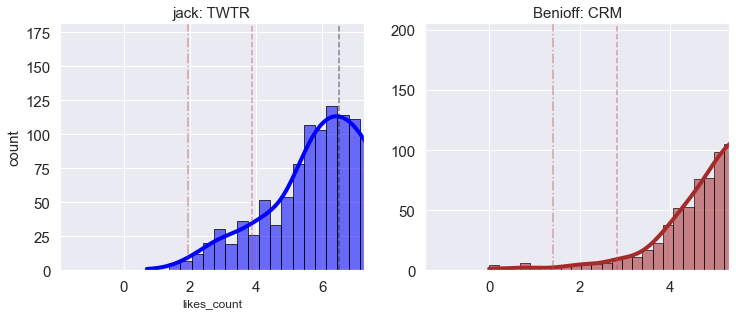

likes_count 
 
 
 
 
 mean 
 6.500099 
 
 
 std 
 1.936212 
 
 
 min 
 0.693147 
 
 
 25% 
 5.384495 
 
 
 50% 
 6.495266 
 
 
 75% 
 7.635545 
 
 
 max 
 13.564961 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 9 
 0.006 
 
 
 btwn_1_2_std 
 131 
 0.091 
 
 
 over_2_std 
 1302 
 0.903 
 
 
 
 
 
 
 likes_count 
 
 
 
 
 mean 
 5.946690 
 
 
 std 
 1.416690 
 
 
 min 
 0.000000 
 
 
 25% 
 5.104426 
 
 
 50% 
 6.014936 
 
 
 75% 
 6.884742 
 
 
 max 
 9.715047 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 4 
 0.002 
 
 
 btwn_0_1_std 
 15 
 0.008 
 
 
 btwn_1_2_std 
 34 
 0.019 
 
 
 over_2_std 
 1787 
 0.973

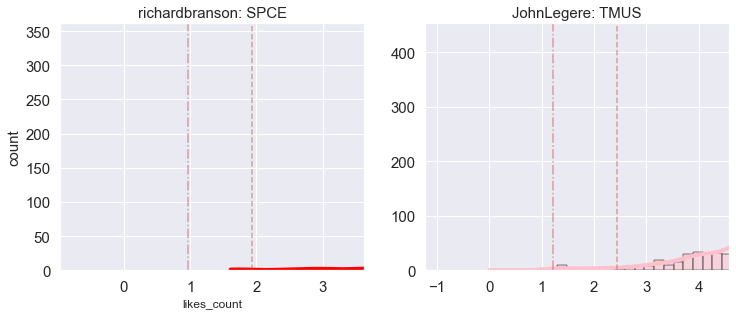

likes_count 
 
 
 
 
 mean 
 6.791607 
 
 
 std 
 0.966642 
 
 
 min 
 1.609438 
 
 
 25% 
 6.228511 
 
 
 50% 
 6.850126 
 
 
 75% 
 7.393263 
 
 
 max 
 12.164125 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 3 
 0.001 
 
 
 over_2_std 
 2006 
 0.999 
 
 
 
 
 
 
 likes_count 
 
 
 
 
 mean 
 6.488352 
 
 
 std 
 1.223649 
 
 
 min 
 0.000000 
 
 
 25% 
 5.922917 
 
 
 50% 
 6.687109 
 
 
 75% 
 7.240291 
 
 
 max 
 10.751350 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 1 
 0.0 
 
 
 btwn_0_1_std 
 4 
 0.001 
 
 
 btwn_1_2_std 
 26 
 0.008 
 
 
 over_2_std 
 3321 
 0.991

In [1375]:
df = eda_df
feature = features[8]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

number of tweets 
 
 
 
 
 mean 
 1.784986 
 
 
 std 
 0.655731 
 
 
 min 
 1.098612 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.609438 
 
 
 75% 
 2.197225 
 
 
 max 
 5.099866 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 11738 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 3143 
 0.268 
 
 
 over_2_std 
 8595 
 0.732

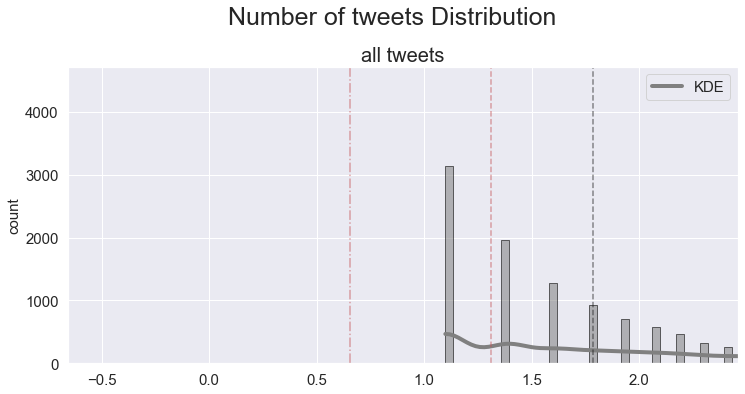

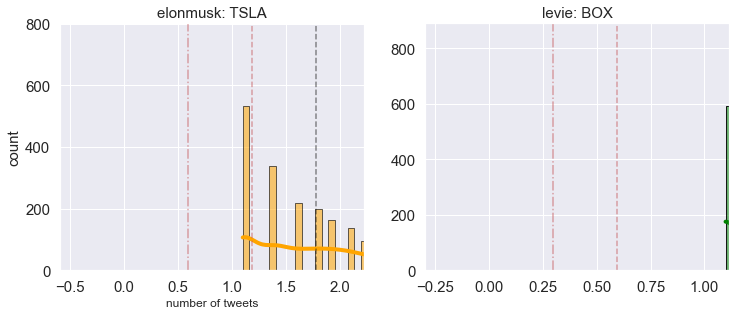

number of tweets 
 
 
 
 
 mean 
 1.776483 
 
 
 std 
 0.592257 
 
 
 min 
 1.098612 
 
 
 25% 
 1.386294 
 
 
 50% 
 1.609438 
 
 
 75% 
 2.197225 
 
 
 max 
 3.891820 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2157 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 534 
 0.248 
 
 
 over_2_std 
 1623 
 0.752 
 
 
 
 
 
 
 number of tweets 
 
 
 
 
 mean 
 1.282392 
 
 
 std 
 0.297758 
 
 
 min 
 1.098612 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.098612 
 
 
 75% 
 1.386294 
 
 
 max 
 2.833213 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 943 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 943 
 1.0

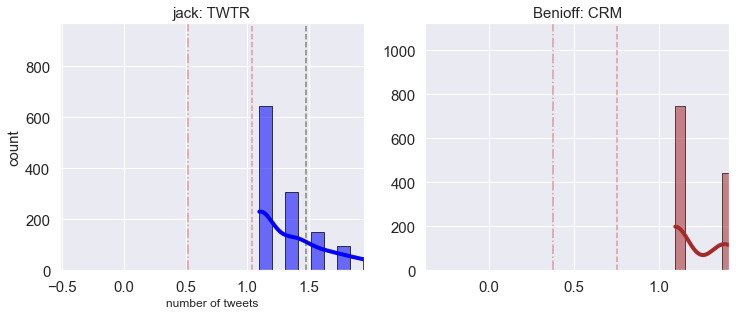

number of tweets 
 
 
 
 
 mean 
 1.481140 
 
 
 std 
 0.519934 
 
 
 min 
 1.098612 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.386294 
 
 
 75% 
 1.609438 
 
 
 max 
 5.099866 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1442 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 1442 
 1.0 
 
 
 
 
 
 
 number of tweets 
 
 
 
 
 mean 
 1.436687 
 
 
 std 
 0.378223 
 
 
 min 
 1.098612 
 
 
 25% 
 1.098612 
 
 
 50% 
 1.386294 
 
 
 75% 
 1.609438 
 
 
 max 
 3.496508 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 1836 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 1836 
 1.0

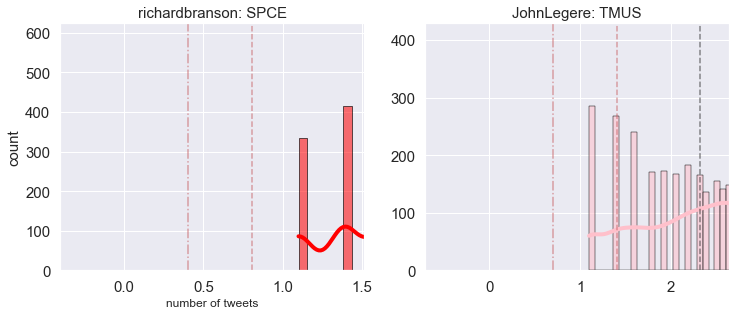

number of tweets 
 
 
 
 
 mean 
 1.678378 
 
 
 std 
 0.403149 
 
 
 min 
 1.098612 
 
 
 25% 
 1.386294 
 
 
 50% 
 1.609438 
 
 
 75% 
 1.945910 
 
 
 max 
 3.637586 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 2009 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 0 
 0.0 
 
 
 over_2_std 
 2009 
 1.0 
 
 
 
 
 
 
 number of tweets 
 
 
 
 
 mean 
 2.317391 
 
 
 std 
 0.704277 
 
 
 min 
 1.098612 
 
 
 25% 
 1.791759 
 
 
 50% 
 2.397895 
 
 
 75% 
 2.833213 
 
 
 max 
 4.905275 
 
 
 
 
 
 
 counts 
 pct_total 
 
 
 
 
 count 
 3351 
 1.0 
 
 
 null_vals 
 0 
 0.0 
 
 
 btwn_0_1_std 
 0 
 0.0 
 
 
 btwn_1_2_std 
 554 
 0.165 
 
 
 over_2_std 
 2797 
 0.835

In [1376]:
df = eda_df
feature = features[9]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

In [1377]:
df = eda_df
feature = features[10]

display_side_by_side(df[[feature]].describe().drop('count'), data_table(df, feature))

plt.figure(figsize=(12,12))
plt.subplot(211)


plot_univariate_dist(df, feature, color='grey', std_lab=False, plot_std=True)
plt.suptitle('{} Distribution'.format(feature.capitalize()), fontsize=25, y=0.95)
plt.ylabel('count', fontsize=15)
plt.xlabel('')
plt.title('all tweets', fontsize=20)
plt.legend(['KDE'], fontsize=15)

plt.show()

i=0

while i < len(mapper):
    
    j = i + 1

    plt.figure(figsize=(12,10))
    plt.subplot(221)

    plot_univariate_dist(df[df['username']==mapper[i][0]], feature, color=mapper[i][2], plot_std=True)
    plt.title(mapper[i][0] + ": " + mapper[i][1], fontsize=15)
    plt.ylabel('count', fontsize=15)

    plt.subplot(222)
    plot_univariate_dist(df[df['username']==mapper[j][0]], feature, color=mapper[j][2], plot_std=True)
    plt.title(mapper[j][0] +': ' + mapper[j][1], fontsize=15)
    plt.ylabel('')
    plt.xlabel('')

    plt.show()

    display_side_by_side(df[[feature]][df['username']==mapper[i][0]].describe().drop('count'), data_table(df[df['username'] == mapper[i][0]], feature), df[[feature]][df['username']==mapper[j][0]].describe().drop('count'), data_table(df[df['username'] == mapper[j][0]], feature))

    i += 2

IndexError: list index out of range

In [ ]:
feat = tweet_stocks[features]
feat += 1
log_feat = np.log(feat)

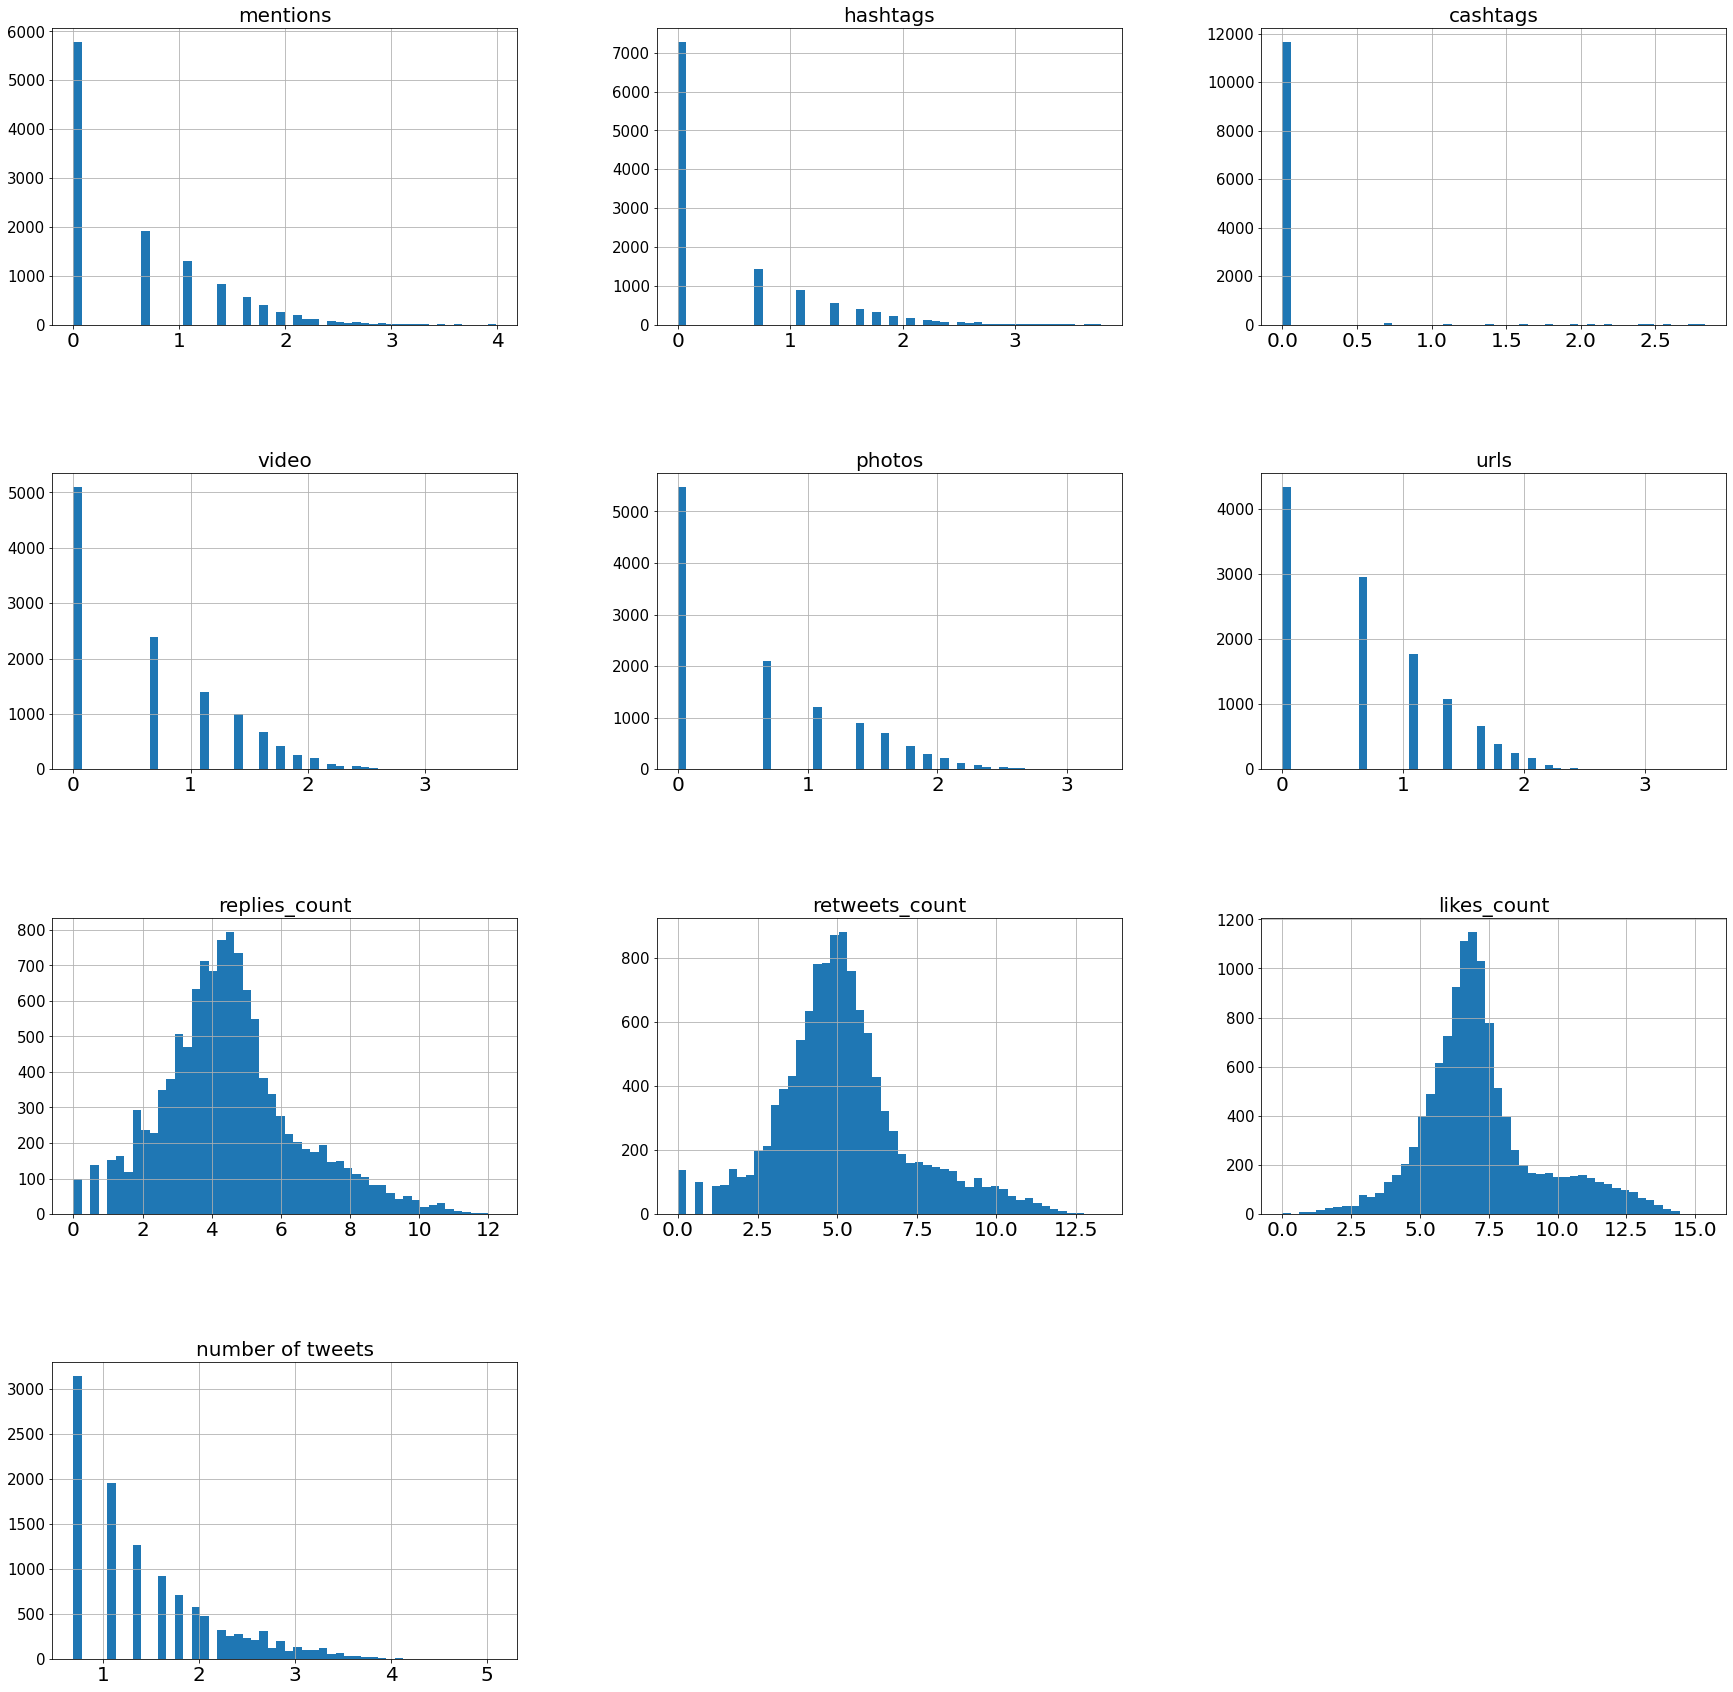

In [19]:
_ = log_feat.hist(bins=50, layout=(4,3), figsize=(30, 30))
_ = plt.subplots_adjust(hspace=.5)

In [25]:
log_feat_targ = pd.concat([log_feat, tweet_stocks['percent change']], axis=1)

In [26]:
log_feat_targ

mentions  hashtags  cashtags     video    photos      urls  \
22    0.000000       0.0       0.0  0.000000  0.000000  0.000000   
23    0.000000       0.0       0.0  0.000000  0.000000  0.000000   
24    0.000000       0.0       0.0  0.000000  0.000000  0.693147   
25    0.000000       0.0       0.0  0.000000  0.000000  0.000000   
26    0.000000       0.0       0.0  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...   
3410  0.000000       0.0       0.0  0.693147  0.693147  1.098612   
3411  0.000000       0.0       0.0  0.000000  0.000000  0.693147   
3412  0.693147       0.0       0.0  0.693147  1.098612  1.386294   
3413  0.000000       0.0       0.0  0.693147  0.693147  0.000000   
3414  0.000000       0.0       0.0  0.000000  0.000000  1.098612   

      replies_count  retweets_count  likes_count  number of tweets  \
22         6.771936        8.442685     9.544381          1.098612   
23         4.234107        4.927254     6.672033          1.098612   
24         4.962845        7.517521     8.903000          0.693147   
25         5.971262        7.611842     9.226804          1.791759   
26         7.056175        8.486528     9.282103          0.693147   
...             ...             ...          ...               ...   
3410       4.955827        3.332205     7.105786          1.386294   
3411       1.791759        1.098612     3.496508          0.693147   
3412       3.258097        2.890372     5.468060          1.609438   
3413       2.079442        1.386294     2.944439          0.693147   
3414       3.367296        2.302585     4.753590          1.098612   

      percent change  
22          0.002318  
23          0.011081  
24         -0.022072  
25          0.007508  
26         -0.039424  
...              ...  
3410       -0.010066  
3411        0.008823  
3412       -0.019593  
3413        0.001245  
3414       -0.002694  

[11738 rows x 11 columns]

In [30]:
np.abs(log_feat_targ.corr()).sort_values(by='percent change')

mentions  hashtags  cashtags     video    photos      urls  \
number of tweets  0.520800  0.626760  0.131261  0.624554  0.608480  0.456541   
cashtags          0.130066  0.135343  1.000000  0.113084  0.108637  0.090587   
mentions          1.000000  0.593304  0.130066  0.605076  0.581573  0.560846   
video             0.605076  0.657340  0.113084  1.000000  0.952695  0.524217   
photos            0.581573  0.632410  0.108637  0.952695  1.000000  0.495565   
urls              0.560846  0.502993  0.090587  0.524217  0.495565  1.000000   
hashtags          0.593304  1.000000  0.135343  0.657340  0.632410  0.502993   
replies_count     0.032459  0.077128  0.024553  0.091583  0.082041  0.004366   
retweets_count    0.002955  0.001868  0.016186  0.081927  0.073658  0.038236   
likes_count       0.102695  0.060268  0.009397  0.006192  0.001788  0.092205   
percent change    0.008695  0.019185  0.005363  0.011744  0.011869  0.012736   

                  replies_count  retweets_count  likes_count  \
number of tweets       0.426320        0.341725     0.310482   
cashtags               0.024553        0.016186     0.009397   
mentions               0.032459        0.002955     0.102695   
video                  0.091583        0.081927     0.006192   
photos                 0.082041        0.073658     0.001788   
urls                   0.004366        0.038236     0.092205   
hashtags               0.077128        0.001868     0.060268   
replies_count          1.000000        0.875676     0.920146   
retweets_count         0.875676        1.000000     0.946287   
likes_count            0.920146        0.946287     1.000000   
percent change         0.021738        0.024987     0.031568   

                  number of tweets  percent change  
number of tweets          1.000000        0.003615  
cashtags                  0.131261        0.005363  
mentions                  0.520800        0.008695  
video                     0.624554        0.011744  
photos                    0.608480        0.011869  
urls                      0.456541        0.012736  
hashtags                  0.626760        0.019185  
replies_count             0.426320        0.021738  
retweets_count            0.341725        0.024987  
likes_count               0.310482        0.031568  
percent change            0.003615        1.000000

In [27]:
log_feat_targ['pct change score'] = pd.qcut(log_feat_targ['percent change'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

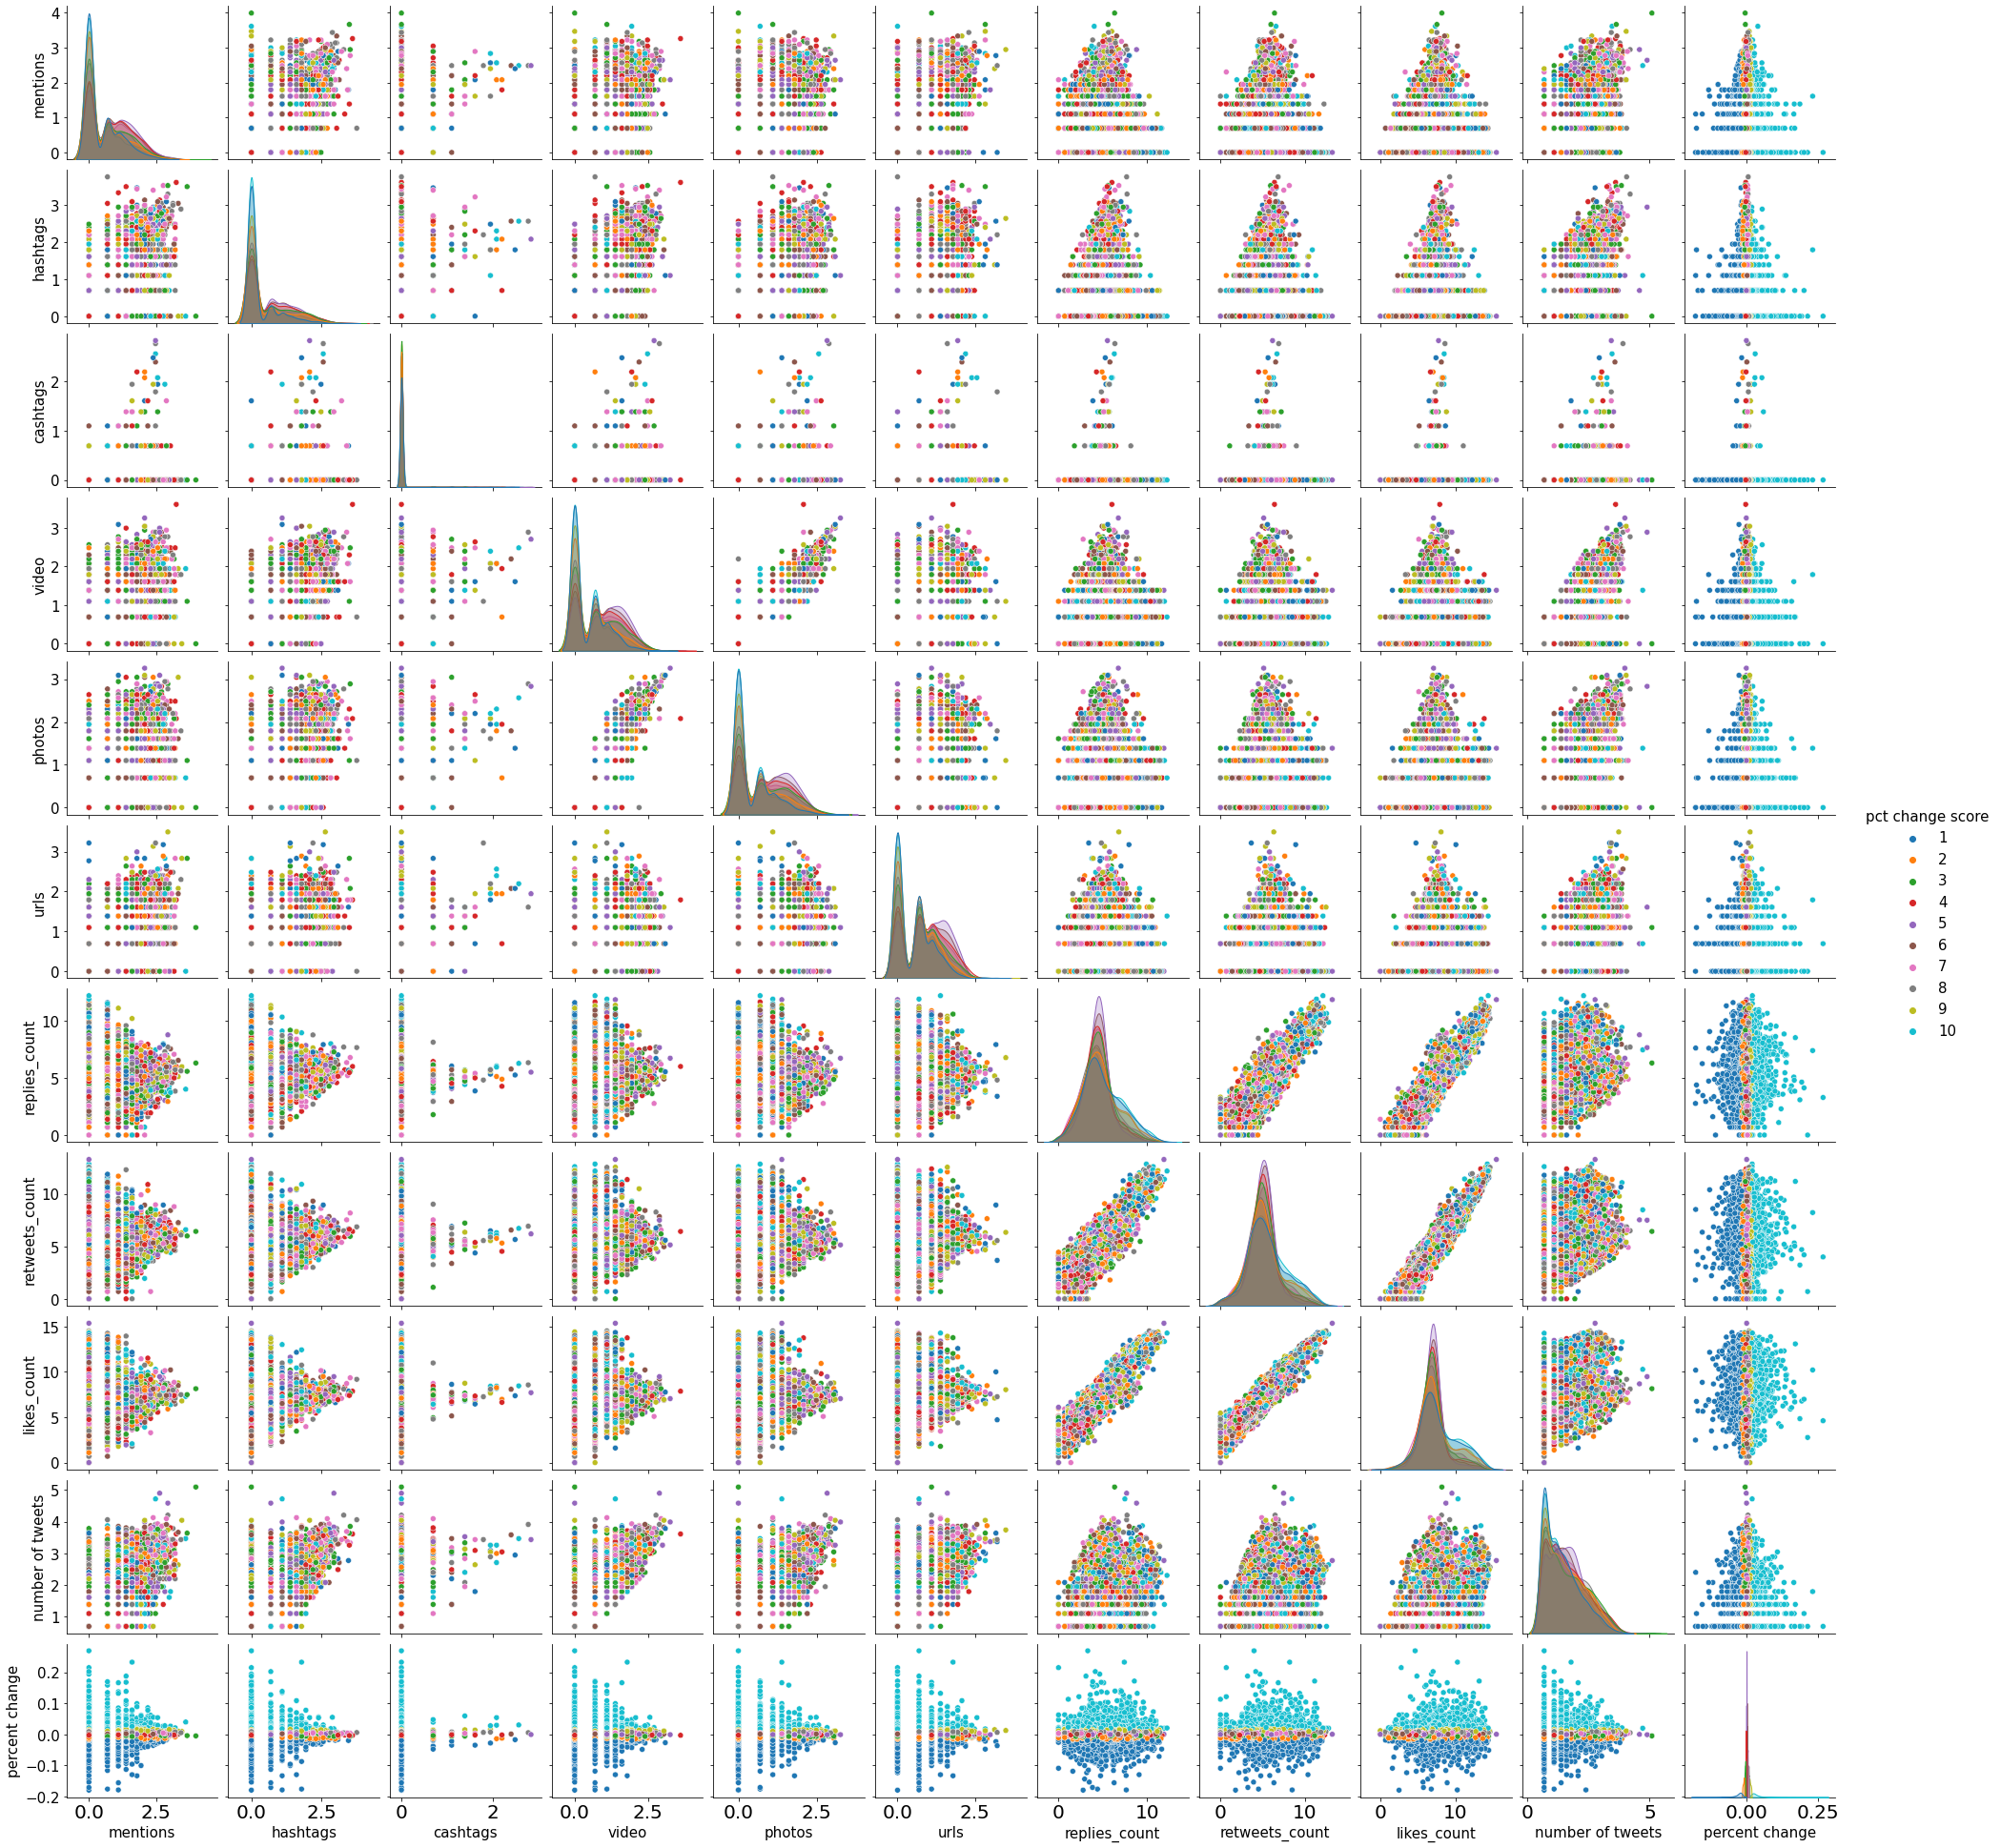

In [28]:
_ = sns.pairplot(log_feat_targ, hue='pct change score')

Video and thumbnail look perfectly correlated, which may indicate that twint double counted them.

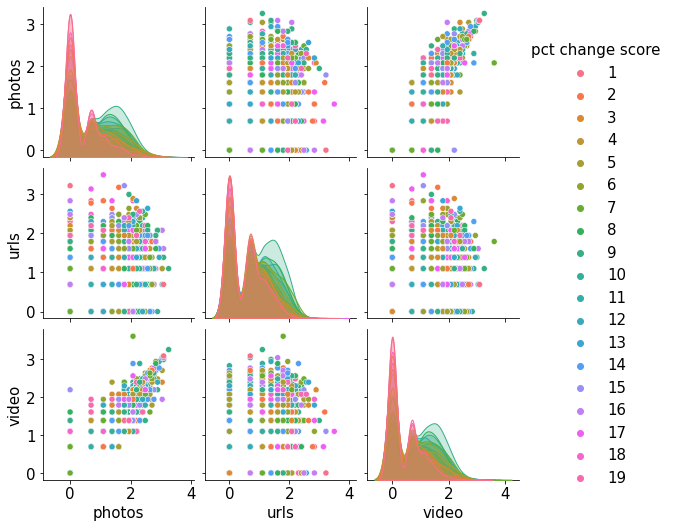

In [140]:
_ = sns.pairplot(log_feat_targ[['photos', 'urls', 'video', 'pct change score']], hue='pct change score')

19


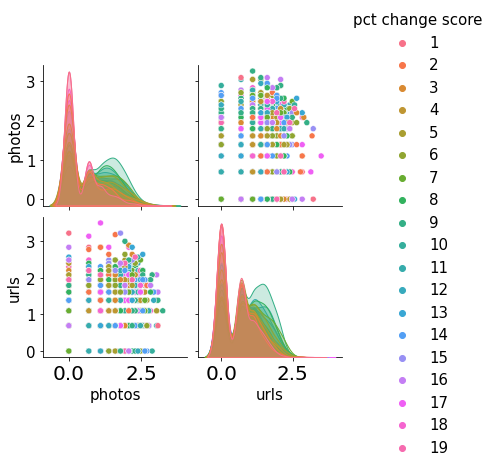

In [116]:
quantiles = [19]
for q in quantiles:
    log_feat_targ['pct change score'] = pd.qcut(log_feat_targ['percent change'], q=q, labels=np.arange(1,q+1))
    print(q)
    _ = sns.pairplot(log_feat_targ[['photos', 'urls', 'pct change score']], hue='pct change score')
    _ = plt.show()

In [ ]:
for i in range(1,11):
    _ = plt.hist(log_feat_targ['urls'][log_feat_targ['pct change score'] == i])
    _ = plt.title(i)
    _ = plt.show()

In [125]:
def best_q(df, q, target_feature):
    
    """
    Separate target feature into q quantiles to return the highest correlated feature and it's Pearson
    correlation score.
    """
    
    best_value = 0
    best_feat = ''
    bin_range = (0, 0)
    best_q = 0
    num_quantiles = 0
    quantiles = [x for x in range(1,q+1)]
    
    for q in quantiles:
        
        df['quantiles'] = pd.qcut(df[target_feature], q=q, labels=np.arange(1,q+1))

        corr_list = []
        
        for i in range(1,q+1):
            
            corr = np.abs(df[df['quantiles'] == i].corr()).sort_values(by=target_feature, ascending=False)
            corr_list.append(corr)


            for i in range(len(corr_list)):
                
                quant = i+1
                value = corr_list[i][target_feature].iloc[1]

                if value > best_value:

                    # update the value, quantile, percent change bin size, and feature

                    low = df[target_feature][df['quantiles'] == i+1].min()
                    high = df[target_feature][df['quantiles'] == i+1].max()

                    best_value = value
                    bin_range = round(low, 4), round(high, 4)
                    best_feat = list(corr_list[i][target_feature].index)[1]
                    best_q = quant
                    num_quantiles = i+1
                    best_df = corr_list[i]

    return best_value, bin_range, best_feat, best_q, num_quantiles, best_df, df

In [190]:
val, b_r, b_f, b_q, num_q, best_df, df = best_q(tweet_stocks, 30, 'percent change')

In [191]:
print(val, b_r, b_f, b_q, num_q)

0.3330839947801327 (-0.0003, 0.0) price 14 14


In [192]:
df

date                                              tweet  \
22   2016-08-23 16:00:00  Journalist Q&amp;A for 30 mins and embargo end...   
23   2016-08-28 09:30:00  @Kotaku one of my favorite games as a kid @Bel...   
24   2016-08-30 16:00:00  Thanks for the longstanding faith in SpaceX. W...   
25   2016-08-31 16:00:00  @Lockyep Not allowed, according to HK regulati...   
26   2016-09-01 16:00:00  Loss of Falcon vehicle today during propellant...   
...                  ...                                                ...   
3410 2021-07-18 16:00:00  Who’s subscribing??  https://t.co/bZr4a84P2X H...   
3411 2021-07-19 09:30:00  Number 16 is a movie night game changer!!  htt...   
3412 2021-07-19 16:00:00  Gorgeous! Maybe I should charter a magenta roc...   
3413 2021-07-20 09:30:00  Call on John is POSTPONED for today but tune i...   
3414 2021-07-20 16:00:00   WOW this looks so delicious!  https://t.co/hn...   

        username  mentions  hashtags  cashtags  video  photos  urls  \
22      elonmusk         0         0         0      0       0     0   
23      elonmusk         0         0         0      0       0     0   
24      elonmusk         0         0         0      0       0     1   
25      elonmusk         0         0         0      0       0     0   
26      elonmusk         0         0         0      0       0     0   
...          ...       ...       ...       ...    ...     ...   ...   
3410  JohnLegere         0         0         0      1       1     2   
3411  JohnLegere         0         0         0      0       0     1   
3412  JohnLegere         1         0         0      1       2     3   
3413  JohnLegere         0         0         0      1       1     0   
3414  JohnLegere         0         0         0      0       0     2   

      replies_count  retweets_count  likes_count  number of tweets  \
22              872            4640        13965                 2   
23               68             137          789                 2   
24              142            1839         7353                 1   
25              391            2021        10165                 5   
26             1159            4848        10743                 1   
...             ...             ...          ...               ...   
3410            141              27         1218                 3   
3411              5               2           32                 1   
3412             25              17          236                 4   
3413              7               3           18                 1   
3414             28               9          115                 2   

           price  percent change quantiles  
22     44.967999        0.002318        19  
23     44.162666        0.011081        26  
24     42.268002       -0.022072         2  
25     42.402000        0.007508        24  
26     40.153999       -0.039424         1  
...          ...             ...       ...  
3410  146.210002       -0.010066         5  
3411  147.500000        0.008823        24  
3412  144.610001       -0.019593         3  
3413  144.789993        0.001245        17  
3414  144.399994       -0.002694        11  

[11738 rows x 16 columns]

In [193]:
best_df

mentions  hashtags  cashtags     video    photos      urls  \
percent change    0.070716  0.011783  0.123837  0.125082  0.089375  0.258512   
price             0.069273  0.074139  0.013634  0.253533  0.226100  0.328580   
urls              0.467676  0.373537  0.059934  0.717557  0.669216  1.000000   
replies_count     0.028459  0.064780  0.007315  0.087222  0.085643  0.078708   
likes_count       0.090964  0.075471  0.006001  0.092931  0.088742  0.087138   
retweets_count    0.081947  0.065611  0.006115  0.082750  0.079712  0.086988   
video             0.491226  0.519507  0.063086  1.000000  0.947677  0.717557   
cashtags          0.024475  0.252847  1.000000  0.063086  0.043099  0.059934   
photos            0.472270  0.503668  0.043099  0.947677  1.000000  0.669216   
number of tweets  0.542918  0.500645  0.160700  0.425910  0.440048  0.228541   
mentions          1.000000  0.516273  0.024475  0.491226  0.472270  0.467676   
hashtags          0.516273  1.000000  0.252847  0.519507  0.503668  0.373537   

                  replies_count  retweets_count  likes_count  \
percent change         0.181846        0.148213     0.165679   
price                  0.215622        0.062986     0.121947   
urls                   0.078708        0.086988     0.087138   
replies_count          1.000000        0.742578     0.883306   
likes_count            0.883306        0.934528     1.000000   
retweets_count         0.742578        1.000000     0.934528   
video                  0.087222        0.082750     0.092931   
cashtags               0.007315        0.006115     0.006001   
photos                 0.085643        0.079712     0.088742   
number of tweets       0.306537        0.062687     0.117132   
mentions               0.028459        0.081947     0.090964   
hashtags               0.064780        0.065611     0.075471   

                  number of tweets     price  percent change  
percent change            0.081585  0.333084        1.000000  
price                     0.028169  1.000000        0.333084  
urls                      0.228541  0.328580        0.258512  
replies_count             0.306537  0.215622        0.181846  
likes_count               0.117132  0.121947        0.165679  
retweets_count            0.062687  0.062986        0.148213  
video                     0.425910  0.253533        0.125082  
cashtags                  0.160700  0.013634        0.123837  
photos                    0.440048  0.226100        0.089375  
number of tweets          1.000000  0.028169        0.081585  
mentions                  0.542918  0.069273        0.070716  
hashtags                  0.500645  0.074139        0.011783

In [53]:
for i in range(len(corr_list)):
    quant = i+1
    value = corr_list[i][target_feature].iloc[1]
    
    if value > best_value:
    
        # update the value, quantile, percent change bin size, and feature
        
        low = log_feat_targ[target_feature][log_feat_targ['quantiles'] == i+1].min()
        high = log_feat_targ[target_feature][log_feat_targ['quantiles'] == i+1].max()
        
        best_value = value
        pct_range = round(low, 4), round(high, 4)
        best_feat = list(corr_list[i][target_feature].index)[1]
        best_q = quant

(-0.0077, -0.0038)

In [ ]:
len(tweet_stocks)

In [ ]:
print(len(tweet_stocks[tweet_stocks['percent change'] >= 0.05]))
print(len(tweet_stocks[tweet_stocks['percent change'] <= -0.05]))